In [15]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import cv2 
from sklearn.model_selection import train_test_split 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

In [7]:
path_to_data = 'C:\Datasets\Dogbreeds'
df = pd.read_csv(os.path.join(path_to_data,'labels.csv'))
df_test = pd.read_csv(os.path.join(path_to_data,'sample_submission.csv'))

In [8]:
targets_series = pd.Series(df['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)
one_hot_labels = np.asarray(one_hot)

im_size = 32
x_train1 = []
y_train1 = []
x_test1 = []
i = 0 

for f, breed in tqdm(df.values):
    img = cv2.imread('C:/Datasets/Dogbreeds/train/{}.jpg'.format(f))
    label = one_hot_labels[i]
#     print(label)
   # x_train1.append(cv2.resize(img, (im_size, im_size)))
    res = tf.keras.backend.resize_images(img,32,32,interpolation='nearest')
    
    y_train1.append(label)
    i += 1
# print(y_train1)
# print(x_train1)    

# for f in tqdm(df_test['id'].values):
#     img = cv2.imread('C:/Datasets/Dogbreeds/test/{}.jpg'.format(f))
#     x_test1.append(cv2.resize(img, (im_size, im_size)))

# y_train_raw = np.array(y_train1, np.uint8)
# x_train_raw = np.array(x_train1, np.float32) / 255.
# x_testContest  = np.array(x_test1, np.float32) / 255.

# num_class = y_train_raw.shape[1]

# print(x_train_raw.shape)
# print(y_train_raw.shape)
# print(x_testContest.shape)    

100%|██████████| 10357/10357 [00:31<00:00, 325.26it/s]


(10222, 32, 32, 3)
(10222, 120)


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x_train_raw, y_train_raw, test_size=0.3, random_state=1)

**Model 1**

In [8]:
learning_rate = 0.001
batch_size = 128
epoch = 200

In [9]:
def model_creation():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',input_shape = (32,32,3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(.3))
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(Dense(120))
  model.add(Activation('softmax'))
  opt = optimizers.rmsprop(lr=learning_rate, decay=1e-6)
  model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
  return model

In [10]:
cnn_basemodel = model_creation()

In [16]:
cnn1 = cnn_basemodel.fit(x_train, y_train, batch_size=batch_size, epochs=epoch,validation_data=(x_test,y_test),shuffle=True)
acc = cnn_basemodel.evaluate(x_test, y_test, verbose=1)

Train on 7155 samples, validate on 3067 samples
Epoch 1/200
7155/7155 [==============================] - ETA: 1:41 - loss: 15.0394 - acc: 0.0000e+ - ETA: 1:39 - loss: 12.8974 - acc: 0.0039   - ETA: 1:36 - loss: 11.8243 - acc: 0.00 - ETA: 1:34 - loss: 10.9497 - acc: 0.00 - ETA: 1:32 - loss: 10.2485 - acc: 0.00 - ETA: 1:30 - loss: 9.7010 - acc: 0.0078 - ETA: 1:28 - loss: 9.2893 - acc: 0.013 - ETA: 1:26 - loss: 8.8756 - acc: 0.015 - ETA: 1:24 - loss: 8.5687 - acc: 0.014 - ETA: 1:22 - loss: 8.2688 - acc: 0.014 - ETA: 1:20 - loss: 8.0055 - acc: 0.014 - ETA: 1:18 - loss: 7.7711 - acc: 0.015 - ETA: 1:17 - loss: 7.5782 - acc: 0.014 - ETA: 1:15 - loss: 7.4139 - acc: 0.014 - ETA: 1:13 - loss: 7.2542 - acc: 0.014 - ETA: 1:11 - loss: 7.1081 - acc: 0.014 - ETA: 1:10 - loss: 6.9909 - acc: 0.014 - ETA: 1:08 - loss: 6.8722 - acc: 0.015 - ETA: 1:06 - loss: 6.7722 - acc: 0.014 - ETA: 1:04 - loss: 6.6794 - acc: 0.013 - ETA: 1:02 - loss: 6.5894 - acc: 0.014 - ETA: 1:01 - loss: 6.5149 - acc: 0.014 - ETA: 5

7155/7155 [==============================] - ETA: 1:38 - loss: 2.9324 - acc: 0.257 - ETA: 1:37 - loss: 2.9546 - acc: 0.293 - ETA: 1:35 - loss: 2.9117 - acc: 0.283 - ETA: 1:33 - loss: 3.0094 - acc: 0.283 - ETA: 1:31 - loss: 2.9928 - acc: 0.292 - ETA: 1:29 - loss: 3.0260 - acc: 0.283 - ETA: 1:27 - loss: 3.0323 - acc: 0.286 - ETA: 1:26 - loss: 3.0374 - acc: 0.286 - ETA: 1:24 - loss: 3.0354 - acc: 0.286 - ETA: 1:22 - loss: 3.0499 - acc: 0.279 - ETA: 1:20 - loss: 3.0466 - acc: 0.274 - ETA: 1:18 - loss: 3.0619 - acc: 0.271 - ETA: 1:17 - loss: 3.0768 - acc: 0.267 - ETA: 1:15 - loss: 3.0847 - acc: 0.265 - ETA: 1:13 - loss: 3.1006 - acc: 0.263 - ETA: 1:11 - loss: 3.1112 - acc: 0.261 - ETA: 1:10 - loss: 3.1244 - acc: 0.259 - ETA: 1:08 - loss: 3.1201 - acc: 0.261 - ETA: 1:06 - loss: 3.1075 - acc: 0.263 - ETA: 1:04 - loss: 3.1261 - acc: 0.259 - ETA: 1:02 - loss: 3.1290 - acc: 0.257 - ETA: 1:01 - loss: 3.1251 - acc: 0.257 - ETA: 59s - loss: 3.1320 - acc: 0.256 - ETA: 57s - loss: 3.1338 - acc: 0.25 

7155/7155 [==============================] - ETA: 2:13 - loss: 1.1056 - acc: 0.703 - ETA: 2:07 - loss: 1.0666 - acc: 0.718 - ETA: 2:03 - loss: 0.9981 - acc: 0.729 - ETA: 1:59 - loss: 0.9878 - acc: 0.738 - ETA: 1:56 - loss: 1.0501 - acc: 0.715 - ETA: 1:53 - loss: 1.0446 - acc: 0.720 - ETA: 1:50 - loss: 1.0452 - acc: 0.722 - ETA: 1:48 - loss: 1.0307 - acc: 0.724 - ETA: 1:46 - loss: 1.0377 - acc: 0.721 - ETA: 1:44 - loss: 1.0532 - acc: 0.717 - ETA: 1:41 - loss: 1.0715 - acc: 0.712 - ETA: 1:39 - loss: 1.0785 - acc: 0.710 - ETA: 1:37 - loss: 1.0760 - acc: 0.710 - ETA: 1:34 - loss: 1.0901 - acc: 0.704 - ETA: 1:32 - loss: 1.0914 - acc: 0.704 - ETA: 1:30 - loss: 1.1174 - acc: 0.700 - ETA: 1:28 - loss: 1.1148 - acc: 0.704 - ETA: 1:25 - loss: 1.1109 - acc: 0.705 - ETA: 1:23 - loss: 1.1045 - acc: 0.707 - ETA: 1:21 - loss: 1.1054 - acc: 0.705 - ETA: 1:19 - loss: 1.1057 - acc: 0.706 - ETA: 1:16 - loss: 1.1057 - acc: 0.706 - ETA: 1:14 - loss: 1.1054 - acc: 0.704 - ETA: 1:12 - loss: 1.1050 - acc: 0.7

7155/7155 [==============================] - ETA: 1:58 - loss: 0.3866 - acc: 0.898 - ETA: 1:56 - loss: 0.4412 - acc: 0.882 - ETA: 1:53 - loss: 0.3922 - acc: 0.893 - ETA: 1:51 - loss: 0.4069 - acc: 0.890 - ETA: 1:49 - loss: 0.3769 - acc: 0.898 - ETA: 1:47 - loss: 0.3813 - acc: 0.897 - ETA: 1:45 - loss: 0.3913 - acc: 0.888 - ETA: 1:43 - loss: 0.3874 - acc: 0.891 - ETA: 1:41 - loss: 0.3911 - acc: 0.889 - ETA: 1:39 - loss: 0.3849 - acc: 0.885 - ETA: 1:36 - loss: 0.3727 - acc: 0.892 - ETA: 1:34 - loss: 0.3700 - acc: 0.893 - ETA: 1:32 - loss: 0.3736 - acc: 0.894 - ETA: 1:30 - loss: 0.3647 - acc: 0.897 - ETA: 1:28 - loss: 0.3656 - acc: 0.896 - ETA: 1:26 - loss: 0.3635 - acc: 0.896 - ETA: 1:24 - loss: 0.3794 - acc: 0.891 - ETA: 1:22 - loss: 0.3878 - acc: 0.890 - ETA: 1:19 - loss: 0.3923 - acc: 0.887 - ETA: 1:17 - loss: 0.3953 - acc: 0.886 - ETA: 1:15 - loss: 0.4025 - acc: 0.885 - ETA: 1:13 - loss: 0.3973 - acc: 0.886 - ETA: 1:11 - loss: 0.3974 - acc: 0.885 - ETA: 1:09 - loss: 0.3990 - acc: 0.8

7155/7155 [==============================] - ETA: 1:53 - loss: 0.2287 - acc: 0.914 - ETA: 1:51 - loss: 0.1796 - acc: 0.941 - ETA: 1:45 - loss: 0.1806 - acc: 0.937 - ETA: 1:42 - loss: 0.1765 - acc: 0.943 - ETA: 1:38 - loss: 0.1747 - acc: 0.946 - ETA: 1:35 - loss: 0.1941 - acc: 0.934 - ETA: 1:32 - loss: 0.2055 - acc: 0.933 - ETA: 1:30 - loss: 0.2036 - acc: 0.933 - ETA: 1:27 - loss: 0.2073 - acc: 0.932 - ETA: 1:25 - loss: 0.2136 - acc: 0.929 - ETA: 1:23 - loss: 0.2160 - acc: 0.931 - ETA: 1:21 - loss: 0.2180 - acc: 0.929 - ETA: 1:19 - loss: 0.2124 - acc: 0.930 - ETA: 1:17 - loss: 0.2111 - acc: 0.931 - ETA: 1:15 - loss: 0.2117 - acc: 0.931 - ETA: 1:13 - loss: 0.2078 - acc: 0.933 - ETA: 1:11 - loss: 0.2061 - acc: 0.933 - ETA: 1:09 - loss: 0.2113 - acc: 0.932 - ETA: 1:08 - loss: 0.2133 - acc: 0.932 - ETA: 1:06 - loss: 0.2109 - acc: 0.933 - ETA: 1:04 - loss: 0.2156 - acc: 0.933 - ETA: 1:02 - loss: 0.2139 - acc: 0.935 - ETA: 1:00 - loss: 0.2131 - acc: 0.934 - ETA: 58s - loss: 0.2111 - acc: 0.93

7155/7155 [==============================] - ETA: 2:14 - loss: 0.1582 - acc: 0.945 - ETA: 2:15 - loss: 0.1212 - acc: 0.957 - ETA: 2:07 - loss: 0.1125 - acc: 0.966 - ETA: 2:01 - loss: 0.1159 - acc: 0.960 - ETA: 1:57 - loss: 0.1224 - acc: 0.960 - ETA: 1:53 - loss: 0.1261 - acc: 0.957 - ETA: 1:51 - loss: 0.1308 - acc: 0.955 - ETA: 1:48 - loss: 0.1280 - acc: 0.958 - ETA: 1:45 - loss: 0.1289 - acc: 0.960 - ETA: 1:43 - loss: 0.1379 - acc: 0.958 - ETA: 1:40 - loss: 0.1416 - acc: 0.957 - ETA: 1:38 - loss: 0.1469 - acc: 0.955 - ETA: 1:35 - loss: 0.1559 - acc: 0.950 - ETA: 1:33 - loss: 0.1527 - acc: 0.952 - ETA: 1:31 - loss: 0.1560 - acc: 0.950 - ETA: 1:28 - loss: 0.1519 - acc: 0.951 - ETA: 1:26 - loss: 0.1510 - acc: 0.951 - ETA: 1:23 - loss: 0.1506 - acc: 0.951 - ETA: 1:21 - loss: 0.1552 - acc: 0.950 - ETA: 1:19 - loss: 0.1548 - acc: 0.951 - ETA: 1:17 - loss: 0.1544 - acc: 0.951 - ETA: 1:14 - loss: 0.1608 - acc: 0.950 - ETA: 1:12 - loss: 0.1601 - acc: 0.950 - ETA: 1:10 - loss: 0.1607 - acc: 0.9

7155/7155 [==============================] - ETA: 1:38 - loss: 0.1211 - acc: 0.960 - ETA: 1:37 - loss: 0.1346 - acc: 0.960 - ETA: 1:35 - loss: 0.1258 - acc: 0.958 - ETA: 1:34 - loss: 0.1156 - acc: 0.962 - ETA: 1:33 - loss: 0.1059 - acc: 0.967 - ETA: 1:31 - loss: 0.1126 - acc: 0.962 - ETA: 1:29 - loss: 0.1098 - acc: 0.963 - ETA: 1:27 - loss: 0.1034 - acc: 0.965 - ETA: 1:25 - loss: 0.1124 - acc: 0.963 - ETA: 1:23 - loss: 0.1321 - acc: 0.958 - ETA: 1:21 - loss: 0.1410 - acc: 0.957 - ETA: 1:19 - loss: 0.1491 - acc: 0.955 - ETA: 1:18 - loss: 0.1410 - acc: 0.957 - ETA: 1:16 - loss: 0.1501 - acc: 0.957 - ETA: 1:14 - loss: 0.1570 - acc: 0.952 - ETA: 1:12 - loss: 0.1557 - acc: 0.952 - ETA: 1:10 - loss: 0.1502 - acc: 0.954 - ETA: 1:09 - loss: 0.1567 - acc: 0.952 - ETA: 1:07 - loss: 0.1602 - acc: 0.951 - ETA: 1:05 - loss: 0.1589 - acc: 0.952 - ETA: 1:03 - loss: 0.1644 - acc: 0.951 - ETA: 1:01 - loss: 0.1678 - acc: 0.951 - ETA: 1:00 - loss: 0.1682 - acc: 0.950 - ETA: 58s - loss: 0.1732 - acc: 0.94

7155/7155 [==============================] - ETA: 1:59 - loss: 0.1373 - acc: 0.960 - ETA: 1:56 - loss: 0.1010 - acc: 0.964 - ETA: 1:54 - loss: 0.1030 - acc: 0.960 - ETA: 1:52 - loss: 0.1409 - acc: 0.957 - ETA: 1:50 - loss: 0.1358 - acc: 0.956 - ETA: 1:48 - loss: 0.1239 - acc: 0.960 - ETA: 1:46 - loss: 0.1195 - acc: 0.963 - ETA: 1:44 - loss: 0.1180 - acc: 0.963 - ETA: 1:41 - loss: 0.1168 - acc: 0.963 - ETA: 1:39 - loss: 0.1232 - acc: 0.960 - ETA: 1:37 - loss: 0.1269 - acc: 0.958 - ETA: 1:35 - loss: 0.1263 - acc: 0.959 - ETA: 1:33 - loss: 0.1225 - acc: 0.960 - ETA: 1:31 - loss: 0.1198 - acc: 0.960 - ETA: 1:29 - loss: 0.1163 - acc: 0.962 - ETA: 1:26 - loss: 0.1153 - acc: 0.960 - ETA: 1:24 - loss: 0.1129 - acc: 0.961 - ETA: 1:22 - loss: 0.1100 - acc: 0.962 - ETA: 1:20 - loss: 0.1089 - acc: 0.963 - ETA: 1:17 - loss: 0.1090 - acc: 0.962 - ETA: 1:14 - loss: 0.1149 - acc: 0.962 - ETA: 1:12 - loss: 0.1141 - acc: 0.961 - ETA: 1:09 - loss: 0.1173 - acc: 0.960 - ETA: 1:07 - loss: 0.1211 - acc: 0.9

7155/7155 [==============================] - ETA: 1:59 - loss: 0.0965 - acc: 0.968 - ETA: 2:00 - loss: 0.1173 - acc: 0.964 - ETA: 1:57 - loss: 0.1107 - acc: 0.968 - ETA: 1:54 - loss: 0.1516 - acc: 0.957 - ETA: 1:51 - loss: 0.1649 - acc: 0.953 - ETA: 1:49 - loss: 0.1633 - acc: 0.955 - ETA: 1:47 - loss: 0.1531 - acc: 0.957 - ETA: 1:44 - loss: 0.1470 - acc: 0.958 - ETA: 1:42 - loss: 0.1355 - acc: 0.961 - ETA: 1:40 - loss: 0.1430 - acc: 0.960 - ETA: 1:38 - loss: 0.1349 - acc: 0.961 - ETA: 1:36 - loss: 0.1322 - acc: 0.961 - ETA: 1:34 - loss: 0.1265 - acc: 0.963 - ETA: 1:33 - loss: 0.1208 - acc: 0.964 - ETA: 1:31 - loss: 0.1202 - acc: 0.965 - ETA: 1:29 - loss: 0.1180 - acc: 0.966 - ETA: 1:27 - loss: 0.1170 - acc: 0.966 - ETA: 1:24 - loss: 0.1196 - acc: 0.964 - ETA: 1:22 - loss: 0.1172 - acc: 0.965 - ETA: 1:20 - loss: 0.1217 - acc: 0.963 - ETA: 1:17 - loss: 0.1224 - acc: 0.963 - ETA: 1:15 - loss: 0.1213 - acc: 0.963 - ETA: 1:13 - loss: 0.1184 - acc: 0.964 - ETA: 1:10 - loss: 0.1263 - acc: 0.9

7155/7155 [==============================] - ETA: 1:50 - loss: 0.0864 - acc: 0.968 - ETA: 1:42 - loss: 0.0886 - acc: 0.976 - ETA: 1:39 - loss: 0.1058 - acc: 0.966 - ETA: 1:36 - loss: 0.1166 - acc: 0.964 - ETA: 1:34 - loss: 0.1121 - acc: 0.965 - ETA: 1:35 - loss: 0.1147 - acc: 0.966 - ETA: 1:32 - loss: 0.1091 - acc: 0.967 - ETA: 1:30 - loss: 0.1081 - acc: 0.968 - ETA: 1:28 - loss: 0.1045 - acc: 0.967 - ETA: 1:25 - loss: 0.1097 - acc: 0.965 - ETA: 1:23 - loss: 0.1132 - acc: 0.963 - ETA: 1:21 - loss: 0.1082 - acc: 0.964 - ETA: 1:20 - loss: 0.1101 - acc: 0.963 - ETA: 1:17 - loss: 0.1099 - acc: 0.963 - ETA: 1:15 - loss: 0.1099 - acc: 0.963 - ETA: 1:13 - loss: 0.1097 - acc: 0.963 - ETA: 1:11 - loss: 0.1106 - acc: 0.963 - ETA: 1:09 - loss: 0.1115 - acc: 0.963 - ETA: 1:08 - loss: 0.1104 - acc: 0.962 - ETA: 1:06 - loss: 0.1104 - acc: 0.962 - ETA: 1:04 - loss: 0.1065 - acc: 0.963 - ETA: 1:02 - loss: 0.1050 - acc: 0.963 - ETA: 1:01 - loss: 0.1069 - acc: 0.963 - ETA: 59s - loss: 0.1080 - acc: 0.96

7155/7155 [==============================] - ETA: 2:20 - loss: 0.2176 - acc: 0.953 - ETA: 2:26 - loss: 0.1499 - acc: 0.960 - ETA: 2:23 - loss: 0.1333 - acc: 0.958 - ETA: 2:17 - loss: 0.1213 - acc: 0.964 - ETA: 2:11 - loss: 0.1318 - acc: 0.960 - ETA: 2:06 - loss: 0.1376 - acc: 0.962 - ETA: 2:02 - loss: 0.1433 - acc: 0.960 - ETA: 1:58 - loss: 0.1535 - acc: 0.960 - ETA: 1:55 - loss: 0.1438 - acc: 0.963 - ETA: 1:51 - loss: 0.1396 - acc: 0.964 - ETA: 1:48 - loss: 0.1353 - acc: 0.964 - ETA: 1:45 - loss: 0.1272 - acc: 0.966 - ETA: 1:42 - loss: 0.1276 - acc: 0.965 - ETA: 1:40 - loss: 0.1253 - acc: 0.966 - ETA: 1:38 - loss: 0.1209 - acc: 0.967 - ETA: 1:37 - loss: 0.1168 - acc: 0.968 - ETA: 1:35 - loss: 0.1125 - acc: 0.969 - ETA: 1:32 - loss: 0.1085 - acc: 0.970 - ETA: 1:30 - loss: 0.1103 - acc: 0.968 - ETA: 1:27 - loss: 0.1083 - acc: 0.968 - ETA: 1:25 - loss: 0.1089 - acc: 0.968 - ETA: 1:23 - loss: 0.1104 - acc: 0.967 - ETA: 1:20 - loss: 0.1101 - acc: 0.967 - ETA: 1:18 - loss: 0.1072 - acc: 0.9

7155/7155 [==============================] - ETA: 2:09 - loss: 0.0338 - acc: 0.992 - ETA: 2:05 - loss: 0.0439 - acc: 0.984 - ETA: 2:00 - loss: 0.0605 - acc: 0.976 - ETA: 1:58 - loss: 0.0661 - acc: 0.976 - ETA: 1:55 - loss: 0.0625 - acc: 0.979 - ETA: 1:52 - loss: 0.0753 - acc: 0.977 - ETA: 1:50 - loss: 0.1121 - acc: 0.972 - ETA: 1:48 - loss: 0.1189 - acc: 0.969 - ETA: 1:46 - loss: 0.1157 - acc: 0.968 - ETA: 1:43 - loss: 0.1106 - acc: 0.970 - ETA: 1:41 - loss: 0.1198 - acc: 0.970 - ETA: 1:39 - loss: 0.1213 - acc: 0.969 - ETA: 1:37 - loss: 0.1187 - acc: 0.969 - ETA: 1:35 - loss: 0.1121 - acc: 0.971 - ETA: 1:32 - loss: 0.1088 - acc: 0.971 - ETA: 1:30 - loss: 0.1076 - acc: 0.971 - ETA: 1:27 - loss: 0.1088 - acc: 0.971 - ETA: 1:25 - loss: 0.1068 - acc: 0.971 - ETA: 1:23 - loss: 0.1043 - acc: 0.972 - ETA: 1:21 - loss: 0.1016 - acc: 0.972 - ETA: 1:19 - loss: 0.0976 - acc: 0.973 - ETA: 1:17 - loss: 0.0951 - acc: 0.973 - ETA: 1:15 - loss: 0.0936 - acc: 0.974 - ETA: 1:13 - loss: 0.0910 - acc: 0.9

7155/7155 [==============================] - ETA: 2:11 - loss: 0.1103 - acc: 0.953 - ETA: 2:12 - loss: 0.0753 - acc: 0.968 - ETA: 2:11 - loss: 0.1171 - acc: 0.955 - ETA: 2:06 - loss: 0.0925 - acc: 0.964 - ETA: 2:02 - loss: 0.0977 - acc: 0.964 - ETA: 1:58 - loss: 0.0900 - acc: 0.967 - ETA: 1:55 - loss: 0.0847 - acc: 0.968 - ETA: 1:51 - loss: 0.0954 - acc: 0.961 - ETA: 1:48 - loss: 0.0922 - acc: 0.965 - ETA: 1:45 - loss: 0.0882 - acc: 0.967 - ETA: 1:42 - loss: 0.0878 - acc: 0.968 - ETA: 1:40 - loss: 0.0894 - acc: 0.968 - ETA: 1:37 - loss: 0.0857 - acc: 0.968 - ETA: 1:34 - loss: 0.0870 - acc: 0.968 - ETA: 1:32 - loss: 0.0875 - acc: 0.968 - ETA: 1:30 - loss: 0.0867 - acc: 0.969 - ETA: 1:27 - loss: 0.0912 - acc: 0.970 - ETA: 1:25 - loss: 0.0991 - acc: 0.970 - ETA: 1:22 - loss: 0.0996 - acc: 0.970 - ETA: 1:20 - loss: 0.0965 - acc: 0.971 - ETA: 1:18 - loss: 0.0972 - acc: 0.971 - ETA: 1:16 - loss: 0.0979 - acc: 0.970 - ETA: 1:14 - loss: 0.0981 - acc: 0.970 - ETA: 1:12 - loss: 0.0975 - acc: 0.9

7155/7155 [==============================] - ETA: 2:21 - loss: 0.0934 - acc: 0.968 - ETA: 2:13 - loss: 0.0727 - acc: 0.976 - ETA: 2:10 - loss: 0.0580 - acc: 0.981 - ETA: 2:04 - loss: 0.0907 - acc: 0.974 - ETA: 2:00 - loss: 0.0994 - acc: 0.970 - ETA: 1:57 - loss: 0.1092 - acc: 0.967 - ETA: 1:54 - loss: 0.0970 - acc: 0.971 - ETA: 1:53 - loss: 0.0868 - acc: 0.973 - ETA: 1:53 - loss: 0.0786 - acc: 0.975 - ETA: 1:53 - loss: 0.0879 - acc: 0.973 - ETA: 1:51 - loss: 0.0890 - acc: 0.973 - ETA: 1:49 - loss: 0.0909 - acc: 0.974 - ETA: 1:46 - loss: 0.0871 - acc: 0.975 - ETA: 1:43 - loss: 0.0895 - acc: 0.973 - ETA: 1:40 - loss: 0.0921 - acc: 0.972 - ETA: 1:38 - loss: 0.0885 - acc: 0.974 - ETA: 1:35 - loss: 0.0909 - acc: 0.972 - ETA: 1:32 - loss: 0.0960 - acc: 0.973 - ETA: 1:30 - loss: 0.0937 - acc: 0.973 - ETA: 1:27 - loss: 0.0948 - acc: 0.973 - ETA: 1:24 - loss: 0.0944 - acc: 0.972 - ETA: 1:22 - loss: 0.0946 - acc: 0.972 - ETA: 1:19 - loss: 0.0920 - acc: 0.972 - ETA: 1:17 - loss: 0.0894 - acc: 0.9

7155/7155 [==============================] - ETA: 1:38 - loss: 0.1162 - acc: 0.976 - ETA: 1:36 - loss: 0.0922 - acc: 0.976 - ETA: 1:34 - loss: 0.0699 - acc: 0.981 - ETA: 1:32 - loss: 0.0710 - acc: 0.982 - ETA: 1:30 - loss: 0.0902 - acc: 0.979 - ETA: 1:29 - loss: 0.1009 - acc: 0.974 - ETA: 1:27 - loss: 0.1051 - acc: 0.973 - ETA: 1:25 - loss: 0.0994 - acc: 0.974 - ETA: 1:23 - loss: 0.1073 - acc: 0.974 - ETA: 1:21 - loss: 0.1022 - acc: 0.973 - ETA: 1:19 - loss: 0.0951 - acc: 0.975 - ETA: 1:18 - loss: 0.0921 - acc: 0.975 - ETA: 1:16 - loss: 0.0923 - acc: 0.975 - ETA: 1:14 - loss: 0.0874 - acc: 0.976 - ETA: 1:13 - loss: 0.0861 - acc: 0.977 - ETA: 1:11 - loss: 0.0818 - acc: 0.978 - ETA: 1:09 - loss: 0.0816 - acc: 0.977 - ETA: 1:07 - loss: 0.0802 - acc: 0.977 - ETA: 1:05 - loss: 0.0766 - acc: 0.978 - ETA: 1:03 - loss: 0.0758 - acc: 0.978 - ETA: 1:02 - loss: 0.0755 - acc: 0.978 - ETA: 1:00 - loss: 0.0763 - acc: 0.978 - ETA: 58s - loss: 0.0739 - acc: 0.978 - ETA: 56s - loss: 0.0770 - acc: 0.97 

7155/7155 [==============================] - ETA: 1:38 - loss: 0.0668 - acc: 0.984 - ETA: 1:38 - loss: 0.0950 - acc: 0.976 - ETA: 1:34 - loss: 0.0758 - acc: 0.979 - ETA: 1:32 - loss: 0.0975 - acc: 0.974 - ETA: 1:31 - loss: 0.1000 - acc: 0.971 - ETA: 1:29 - loss: 0.0878 - acc: 0.975 - ETA: 1:27 - loss: 0.0790 - acc: 0.976 - ETA: 1:25 - loss: 0.0704 - acc: 0.978 - ETA: 1:23 - loss: 0.0701 - acc: 0.978 - ETA: 1:21 - loss: 0.0731 - acc: 0.978 - ETA: 1:20 - loss: 0.0745 - acc: 0.977 - ETA: 1:18 - loss: 0.0742 - acc: 0.977 - ETA: 1:16 - loss: 0.0698 - acc: 0.979 - ETA: 1:14 - loss: 0.0767 - acc: 0.977 - ETA: 1:12 - loss: 0.0725 - acc: 0.978 - ETA: 1:11 - loss: 0.0731 - acc: 0.978 - ETA: 1:09 - loss: 0.0709 - acc: 0.978 - ETA: 1:07 - loss: 0.0738 - acc: 0.977 - ETA: 1:05 - loss: 0.0756 - acc: 0.977 - ETA: 1:04 - loss: 0.0723 - acc: 0.978 - ETA: 1:02 - loss: 0.0757 - acc: 0.976 - ETA: 1:00 - loss: 0.0747 - acc: 0.976 - ETA: 58s - loss: 0.0736 - acc: 0.977 - ETA: 56s - loss: 0.0732 - acc: 0.97 

7155/7155 [==============================] - ETA: 1:39 - loss: 0.0883 - acc: 0.960 - ETA: 1:36 - loss: 0.1274 - acc: 0.968 - ETA: 1:34 - loss: 0.1086 - acc: 0.971 - ETA: 1:32 - loss: 0.1201 - acc: 0.966 - ETA: 1:30 - loss: 0.1325 - acc: 0.967 - ETA: 1:29 - loss: 0.1297 - acc: 0.966 - ETA: 1:27 - loss: 0.1128 - acc: 0.971 - ETA: 1:25 - loss: 0.1037 - acc: 0.973 - ETA: 1:23 - loss: 0.1021 - acc: 0.974 - ETA: 1:21 - loss: 0.1021 - acc: 0.971 - ETA: 1:19 - loss: 0.1018 - acc: 0.971 - ETA: 1:17 - loss: 0.0965 - acc: 0.973 - ETA: 1:15 - loss: 0.1005 - acc: 0.972 - ETA: 1:14 - loss: 0.0984 - acc: 0.972 - ETA: 1:12 - loss: 0.0976 - acc: 0.973 - ETA: 1:11 - loss: 0.0936 - acc: 0.974 - ETA: 1:09 - loss: 0.0892 - acc: 0.975 - ETA: 1:07 - loss: 0.0882 - acc: 0.975 - ETA: 1:05 - loss: 0.0875 - acc: 0.975 - ETA: 1:03 - loss: 0.0840 - acc: 0.976 - ETA: 1:02 - loss: 0.0836 - acc: 0.976 - ETA: 1:00 - loss: 0.0873 - acc: 0.974 - ETA: 58s - loss: 0.0848 - acc: 0.975 - ETA: 56s - loss: 0.0831 - acc: 0.97 

7155/7155 [==============================] - ETA: 1:43 - loss: 0.0158 - acc: 1.000 - ETA: 1:41 - loss: 0.0613 - acc: 0.972 - ETA: 1:37 - loss: 0.0832 - acc: 0.971 - ETA: 1:34 - loss: 0.0751 - acc: 0.976 - ETA: 1:32 - loss: 0.0715 - acc: 0.978 - ETA: 1:30 - loss: 0.0716 - acc: 0.977 - ETA: 1:28 - loss: 0.0806 - acc: 0.976 - ETA: 1:26 - loss: 0.0776 - acc: 0.978 - ETA: 1:24 - loss: 0.0838 - acc: 0.975 - ETA: 1:22 - loss: 0.0763 - acc: 0.978 - ETA: 1:20 - loss: 0.0716 - acc: 0.979 - ETA: 1:18 - loss: 0.0680 - acc: 0.980 - ETA: 1:16 - loss: 0.0690 - acc: 0.980 - ETA: 1:15 - loss: 0.0700 - acc: 0.981 - ETA: 1:13 - loss: 0.0730 - acc: 0.980 - ETA: 1:11 - loss: 0.0788 - acc: 0.979 - ETA: 1:09 - loss: 0.0763 - acc: 0.979 - ETA: 1:07 - loss: 0.0727 - acc: 0.980 - ETA: 1:05 - loss: 0.0810 - acc: 0.979 - ETA: 1:04 - loss: 0.0833 - acc: 0.978 - ETA: 1:02 - loss: 0.0845 - acc: 0.978 - ETA: 1:00 - loss: 0.0860 - acc: 0.977 - ETA: 58s - loss: 0.0851 - acc: 0.977 - ETA: 56s - loss: 0.0829 - acc: 0.97 

7155/7155 [==============================] - ETA: 1:38 - loss: 0.0234 - acc: 0.992 - ETA: 1:35 - loss: 0.0242 - acc: 0.992 - ETA: 1:33 - loss: 0.0473 - acc: 0.987 - ETA: 1:31 - loss: 0.0509 - acc: 0.988 - ETA: 1:29 - loss: 0.0603 - acc: 0.984 - ETA: 1:28 - loss: 0.0724 - acc: 0.984 - ETA: 1:27 - loss: 0.0674 - acc: 0.985 - ETA: 1:25 - loss: 0.0692 - acc: 0.984 - ETA: 1:23 - loss: 0.0665 - acc: 0.983 - ETA: 1:21 - loss: 0.0637 - acc: 0.984 - ETA: 1:20 - loss: 0.0596 - acc: 0.985 - ETA: 1:18 - loss: 0.0575 - acc: 0.985 - ETA: 1:16 - loss: 0.0547 - acc: 0.985 - ETA: 1:14 - loss: 0.0632 - acc: 0.983 - ETA: 1:12 - loss: 0.0605 - acc: 0.983 - ETA: 1:11 - loss: 0.0599 - acc: 0.982 - ETA: 1:09 - loss: 0.0591 - acc: 0.983 - ETA: 1:07 - loss: 0.0580 - acc: 0.983 - ETA: 1:05 - loss: 0.0554 - acc: 0.984 - ETA: 1:03 - loss: 0.0542 - acc: 0.984 - ETA: 1:02 - loss: 0.0545 - acc: 0.983 - ETA: 1:00 - loss: 0.0548 - acc: 0.983 - ETA: 58s - loss: 0.0529 - acc: 0.984 - ETA: 56s - loss: 0.0508 - acc: 0.98 

7155/7155 [==============================] - ETA: 1:36 - loss: 0.0182 - acc: 0.992 - ETA: 1:36 - loss: 0.0127 - acc: 0.996 - ETA: 1:35 - loss: 0.0271 - acc: 0.992 - ETA: 1:33 - loss: 0.0317 - acc: 0.990 - ETA: 1:31 - loss: 0.0564 - acc: 0.987 - ETA: 1:29 - loss: 0.0503 - acc: 0.988 - ETA: 1:27 - loss: 0.0478 - acc: 0.987 - ETA: 1:25 - loss: 0.0475 - acc: 0.987 - ETA: 1:23 - loss: 0.0461 - acc: 0.986 - ETA: 1:21 - loss: 0.0523 - acc: 0.984 - ETA: 1:20 - loss: 0.0497 - acc: 0.984 - ETA: 1:18 - loss: 0.0541 - acc: 0.984 - ETA: 1:16 - loss: 0.0503 - acc: 0.985 - ETA: 1:14 - loss: 0.0515 - acc: 0.985 - ETA: 1:12 - loss: 0.0503 - acc: 0.985 - ETA: 1:10 - loss: 0.0499 - acc: 0.985 - ETA: 1:09 - loss: 0.0481 - acc: 0.985 - ETA: 1:07 - loss: 0.0570 - acc: 0.984 - ETA: 1:05 - loss: 0.0552 - acc: 0.985 - ETA: 1:03 - loss: 0.0636 - acc: 0.984 - ETA: 1:02 - loss: 0.0640 - acc: 0.984 - ETA: 1:00 - loss: 0.0644 - acc: 0.984 - ETA: 58s - loss: 0.0671 - acc: 0.984 - ETA: 56s - loss: 0.0653 - acc: 0.98 

7155/7155 [==============================] - ETA: 1:42 - loss: 0.0416 - acc: 0.984 - ETA: 1:39 - loss: 0.0344 - acc: 0.984 - ETA: 1:37 - loss: 0.0522 - acc: 0.981 - ETA: 1:36 - loss: 0.0423 - acc: 0.984 - ETA: 1:34 - loss: 0.0600 - acc: 0.981 - ETA: 1:32 - loss: 0.0577 - acc: 0.981 - ETA: 1:30 - loss: 0.0506 - acc: 0.983 - ETA: 1:28 - loss: 0.0566 - acc: 0.980 - ETA: 1:26 - loss: 0.0540 - acc: 0.981 - ETA: 1:24 - loss: 0.0520 - acc: 0.982 - ETA: 1:22 - loss: 0.0498 - acc: 0.982 - ETA: 1:21 - loss: 0.0531 - acc: 0.982 - ETA: 1:19 - loss: 0.0507 - acc: 0.982 - ETA: 1:17 - loss: 0.0509 - acc: 0.983 - ETA: 1:16 - loss: 0.0500 - acc: 0.982 - ETA: 1:14 - loss: 0.0508 - acc: 0.982 - ETA: 1:12 - loss: 0.0540 - acc: 0.982 - ETA: 1:10 - loss: 0.0531 - acc: 0.982 - ETA: 1:09 - loss: 0.0509 - acc: 0.983 - ETA: 1:07 - loss: 0.0506 - acc: 0.983 - ETA: 1:05 - loss: 0.0528 - acc: 0.982 - ETA: 1:03 - loss: 0.0525 - acc: 0.981 - ETA: 1:01 - loss: 0.0541 - acc: 0.981 - ETA: 59s - loss: 0.0567 - acc: 0.98

7155/7155 [==============================] - ETA: 1:37 - loss: 0.1029 - acc: 0.976 - ETA: 1:35 - loss: 0.0584 - acc: 0.984 - ETA: 1:34 - loss: 0.0580 - acc: 0.984 - ETA: 1:32 - loss: 0.0551 - acc: 0.984 - ETA: 1:30 - loss: 0.0532 - acc: 0.982 - ETA: 1:28 - loss: 0.0592 - acc: 0.981 - ETA: 1:26 - loss: 0.0754 - acc: 0.981 - ETA: 1:25 - loss: 0.0671 - acc: 0.983 - ETA: 1:23 - loss: 0.0648 - acc: 0.982 - ETA: 1:22 - loss: 0.0617 - acc: 0.983 - ETA: 1:20 - loss: 0.0579 - acc: 0.984 - ETA: 1:18 - loss: 0.0578 - acc: 0.985 - ETA: 1:16 - loss: 0.0540 - acc: 0.986 - ETA: 1:14 - loss: 0.0516 - acc: 0.986 - ETA: 1:12 - loss: 0.0509 - acc: 0.986 - ETA: 1:11 - loss: 0.0554 - acc: 0.985 - ETA: 1:09 - loss: 0.0543 - acc: 0.986 - ETA: 1:07 - loss: 0.0541 - acc: 0.986 - ETA: 1:05 - loss: 0.0535 - acc: 0.986 - ETA: 1:04 - loss: 0.0541 - acc: 0.985 - ETA: 1:02 - loss: 0.0541 - acc: 0.985 - ETA: 1:00 - loss: 0.0520 - acc: 0.986 - ETA: 58s - loss: 0.0547 - acc: 0.985 - ETA: 57s - loss: 0.0555 - acc: 0.98 

7155/7155 [==============================] - ETA: 1:37 - loss: 0.0192 - acc: 0.992 - ETA: 1:36 - loss: 0.0599 - acc: 0.980 - ETA: 1:33 - loss: 0.0540 - acc: 0.981 - ETA: 1:32 - loss: 0.0587 - acc: 0.978 - ETA: 1:30 - loss: 0.0815 - acc: 0.976 - ETA: 1:28 - loss: 0.0768 - acc: 0.979 - ETA: 1:26 - loss: 0.0879 - acc: 0.977 - ETA: 1:25 - loss: 0.0988 - acc: 0.976 - ETA: 1:23 - loss: 0.0973 - acc: 0.976 - ETA: 1:21 - loss: 0.0961 - acc: 0.976 - ETA: 1:19 - loss: 0.0877 - acc: 0.978 - ETA: 1:17 - loss: 0.0820 - acc: 0.979 - ETA: 1:16 - loss: 0.0783 - acc: 0.980 - ETA: 1:14 - loss: 0.0770 - acc: 0.979 - ETA: 1:12 - loss: 0.0860 - acc: 0.979 - ETA: 1:11 - loss: 0.0826 - acc: 0.980 - ETA: 1:09 - loss: 0.0812 - acc: 0.980 - ETA: 1:07 - loss: 0.0793 - acc: 0.980 - ETA: 1:05 - loss: 0.0764 - acc: 0.980 - ETA: 1:03 - loss: 0.0801 - acc: 0.978 - ETA: 1:02 - loss: 0.0795 - acc: 0.979 - ETA: 1:00 - loss: 0.0759 - acc: 0.980 - ETA: 58s - loss: 0.0733 - acc: 0.980 - ETA: 56s - loss: 0.0730 - acc: 0.97 

7155/7155 [==============================] - ETA: 1:41 - loss: 0.1853 - acc: 0.976 - ETA: 1:38 - loss: 0.1203 - acc: 0.976 - ETA: 1:35 - loss: 0.1061 - acc: 0.979 - ETA: 1:33 - loss: 0.0808 - acc: 0.984 - ETA: 1:31 - loss: 0.0857 - acc: 0.981 - ETA: 1:29 - loss: 0.0832 - acc: 0.980 - ETA: 1:27 - loss: 0.0877 - acc: 0.977 - ETA: 1:25 - loss: 0.0864 - acc: 0.975 - ETA: 1:23 - loss: 0.0808 - acc: 0.976 - ETA: 1:22 - loss: 0.0823 - acc: 0.975 - ETA: 1:20 - loss: 0.0784 - acc: 0.976 - ETA: 1:18 - loss: 0.0797 - acc: 0.975 - ETA: 1:16 - loss: 0.0773 - acc: 0.977 - ETA: 1:14 - loss: 0.0811 - acc: 0.976 - ETA: 1:13 - loss: 0.0778 - acc: 0.977 - ETA: 1:11 - loss: 0.0763 - acc: 0.977 - ETA: 1:09 - loss: 0.0765 - acc: 0.977 - ETA: 1:07 - loss: 0.0771 - acc: 0.978 - ETA: 1:05 - loss: 0.0766 - acc: 0.978 - ETA: 1:03 - loss: 0.0760 - acc: 0.979 - ETA: 1:02 - loss: 0.0739 - acc: 0.979 - ETA: 1:00 - loss: 0.0739 - acc: 0.980 - ETA: 58s - loss: 0.0791 - acc: 0.978 - ETA: 56s - loss: 0.0793 - acc: 0.97 

7155/7155 [==============================] - ETA: 1:39 - loss: 0.0489 - acc: 0.984 - ETA: 1:35 - loss: 0.0632 - acc: 0.980 - ETA: 1:34 - loss: 0.0668 - acc: 0.984 - ETA: 1:32 - loss: 0.0752 - acc: 0.982 - ETA: 1:30 - loss: 0.0816 - acc: 0.981 - ETA: 1:29 - loss: 0.0740 - acc: 0.983 - ETA: 1:28 - loss: 0.0805 - acc: 0.983 - ETA: 1:26 - loss: 0.0705 - acc: 0.985 - ETA: 1:24 - loss: 0.0639 - acc: 0.986 - ETA: 1:22 - loss: 0.0769 - acc: 0.983 - ETA: 1:20 - loss: 0.0747 - acc: 0.982 - ETA: 1:18 - loss: 0.0749 - acc: 0.982 - ETA: 1:16 - loss: 0.0750 - acc: 0.982 - ETA: 1:15 - loss: 0.0700 - acc: 0.983 - ETA: 1:13 - loss: 0.0656 - acc: 0.984 - ETA: 1:11 - loss: 0.0616 - acc: 0.985 - ETA: 1:09 - loss: 0.0581 - acc: 0.986 - ETA: 1:08 - loss: 0.0601 - acc: 0.986 - ETA: 1:06 - loss: 0.0569 - acc: 0.986 - ETA: 1:04 - loss: 0.0560 - acc: 0.987 - ETA: 1:02 - loss: 0.0579 - acc: 0.987 - ETA: 1:00 - loss: 0.0595 - acc: 0.986 - ETA: 58s - loss: 0.0591 - acc: 0.986 - ETA: 57s - loss: 0.0569 - acc: 0.98 

7155/7155 [==============================] - ETA: 1:36 - loss: 0.0708 - acc: 0.968 - ETA: 1:34 - loss: 0.0423 - acc: 0.980 - ETA: 1:35 - loss: 0.0497 - acc: 0.984 - ETA: 1:33 - loss: 0.0414 - acc: 0.988 - ETA: 1:30 - loss: 0.0368 - acc: 0.989 - ETA: 1:29 - loss: 0.0454 - acc: 0.988 - ETA: 1:27 - loss: 0.0584 - acc: 0.988 - ETA: 1:25 - loss: 0.0618 - acc: 0.987 - ETA: 1:23 - loss: 0.0572 - acc: 0.987 - ETA: 1:21 - loss: 0.0636 - acc: 0.985 - ETA: 1:19 - loss: 0.0580 - acc: 0.987 - ETA: 1:18 - loss: 0.0592 - acc: 0.987 - ETA: 1:16 - loss: 0.0612 - acc: 0.986 - ETA: 1:14 - loss: 0.0569 - acc: 0.987 - ETA: 1:12 - loss: 0.0552 - acc: 0.987 - ETA: 1:11 - loss: 0.0528 - acc: 0.986 - ETA: 1:09 - loss: 0.0550 - acc: 0.985 - ETA: 1:07 - loss: 0.0538 - acc: 0.986 - ETA: 1:05 - loss: 0.0599 - acc: 0.985 - ETA: 1:03 - loss: 0.0590 - acc: 0.985 - ETA: 1:02 - loss: 0.0575 - acc: 0.985 - ETA: 1:00 - loss: 0.0551 - acc: 0.986 - ETA: 58s - loss: 0.0565 - acc: 0.986 - ETA: 56s - loss: 0.0557 - acc: 0.98 

7155/7155 [==============================] - ETA: 1:38 - loss: 0.0146 - acc: 0.992 - ETA: 1:35 - loss: 0.0749 - acc: 0.980 - ETA: 1:33 - loss: 0.0582 - acc: 0.981 - ETA: 1:32 - loss: 0.0994 - acc: 0.978 - ETA: 1:30 - loss: 0.0843 - acc: 0.981 - ETA: 1:28 - loss: 0.0704 - acc: 0.984 - ETA: 1:26 - loss: 0.0605 - acc: 0.986 - ETA: 1:25 - loss: 0.0574 - acc: 0.986 - ETA: 1:23 - loss: 0.0618 - acc: 0.986 - ETA: 1:22 - loss: 0.0592 - acc: 0.985 - ETA: 1:20 - loss: 0.0558 - acc: 0.986 - ETA: 1:18 - loss: 0.0675 - acc: 0.985 - ETA: 1:16 - loss: 0.0737 - acc: 0.983 - ETA: 1:14 - loss: 0.0716 - acc: 0.983 - ETA: 1:12 - loss: 0.0710 - acc: 0.982 - ETA: 1:10 - loss: 0.0681 - acc: 0.982 - ETA: 1:09 - loss: 0.0652 - acc: 0.983 - ETA: 1:07 - loss: 0.0623 - acc: 0.983 - ETA: 1:05 - loss: 0.0592 - acc: 0.984 - ETA: 1:03 - loss: 0.0638 - acc: 0.984 - ETA: 1:02 - loss: 0.0629 - acc: 0.984 - ETA: 1:00 - loss: 0.0633 - acc: 0.983 - ETA: 58s - loss: 0.0678 - acc: 0.982 - ETA: 56s - loss: 0.0659 - acc: 0.98 

7155/7155 [==============================] - ETA: 1:36 - loss: 0.0425 - acc: 0.976 - ETA: 1:35 - loss: 0.0233 - acc: 0.988 - ETA: 1:33 - loss: 0.0236 - acc: 0.987 - ETA: 1:31 - loss: 0.0258 - acc: 0.986 - ETA: 1:30 - loss: 0.0343 - acc: 0.982 - ETA: 1:28 - loss: 0.0388 - acc: 0.983 - ETA: 1:27 - loss: 0.0471 - acc: 0.982 - ETA: 1:25 - loss: 0.0480 - acc: 0.981 - ETA: 1:23 - loss: 0.0532 - acc: 0.981 - ETA: 1:21 - loss: 0.0547 - acc: 0.981 - ETA: 1:20 - loss: 0.0588 - acc: 0.980 - ETA: 1:18 - loss: 0.0604 - acc: 0.981 - ETA: 1:16 - loss: 0.0560 - acc: 0.982 - ETA: 1:14 - loss: 0.0596 - acc: 0.982 - ETA: 1:13 - loss: 0.0574 - acc: 0.982 - ETA: 1:11 - loss: 0.0553 - acc: 0.982 - ETA: 1:09 - loss: 0.0567 - acc: 0.983 - ETA: 1:07 - loss: 0.0553 - acc: 0.983 - ETA: 1:05 - loss: 0.0567 - acc: 0.982 - ETA: 1:03 - loss: 0.0552 - acc: 0.982 - ETA: 1:02 - loss: 0.0547 - acc: 0.982 - ETA: 1:00 - loss: 0.0543 - acc: 0.982 - ETA: 58s - loss: 0.0523 - acc: 0.983 - ETA: 56s - loss: 0.0531 - acc: 0.98 

7155/7155 [==============================] - ETA: 1:38 - loss: 0.1161 - acc: 0.968 - ETA: 1:38 - loss: 0.0981 - acc: 0.980 - ETA: 1:35 - loss: 0.0741 - acc: 0.984 - ETA: 1:33 - loss: 0.0613 - acc: 0.984 - ETA: 1:31 - loss: 0.0498 - acc: 0.987 - ETA: 1:29 - loss: 0.0529 - acc: 0.985 - ETA: 1:27 - loss: 0.0505 - acc: 0.986 - ETA: 1:25 - loss: 0.0455 - acc: 0.988 - ETA: 1:23 - loss: 0.0429 - acc: 0.988 - ETA: 1:21 - loss: 0.0406 - acc: 0.989 - ETA: 1:20 - loss: 0.0378 - acc: 0.989 - ETA: 1:18 - loss: 0.0347 - acc: 0.990 - ETA: 1:16 - loss: 0.0324 - acc: 0.991 - ETA: 1:14 - loss: 0.0327 - acc: 0.990 - ETA: 1:12 - loss: 0.0325 - acc: 0.989 - ETA: 1:11 - loss: 0.0381 - acc: 0.987 - ETA: 1:09 - loss: 0.0374 - acc: 0.988 - ETA: 1:07 - loss: 0.0404 - acc: 0.987 - ETA: 1:05 - loss: 0.0405 - acc: 0.987 - ETA: 1:03 - loss: 0.0431 - acc: 0.987 - ETA: 1:02 - loss: 0.0423 - acc: 0.988 - ETA: 1:00 - loss: 0.0409 - acc: 0.988 - ETA: 58s - loss: 0.0397 - acc: 0.988 - ETA: 56s - loss: 0.0422 - acc: 0.98 

7155/7155 [==============================] - ETA: 1:37 - loss: 0.0029 - acc: 1.000 - ETA: 1:35 - loss: 0.0296 - acc: 0.988 - ETA: 1:33 - loss: 0.0295 - acc: 0.989 - ETA: 1:31 - loss: 0.0230 - acc: 0.992 - ETA: 1:29 - loss: 0.0234 - acc: 0.992 - ETA: 1:27 - loss: 0.0346 - acc: 0.990 - ETA: 1:25 - loss: 0.0370 - acc: 0.991 - ETA: 1:24 - loss: 0.0388 - acc: 0.990 - ETA: 1:22 - loss: 0.0432 - acc: 0.989 - ETA: 1:21 - loss: 0.0410 - acc: 0.989 - ETA: 1:19 - loss: 0.0384 - acc: 0.990 - ETA: 1:17 - loss: 0.0399 - acc: 0.989 - ETA: 1:15 - loss: 0.0370 - acc: 0.990 - ETA: 1:14 - loss: 0.0349 - acc: 0.991 - ETA: 1:12 - loss: 0.0344 - acc: 0.990 - ETA: 1:10 - loss: 0.0341 - acc: 0.990 - ETA: 1:09 - loss: 0.0379 - acc: 0.990 - ETA: 1:07 - loss: 0.0371 - acc: 0.990 - ETA: 1:05 - loss: 0.0361 - acc: 0.990 - ETA: 1:03 - loss: 0.0358 - acc: 0.990 - ETA: 1:01 - loss: 0.0368 - acc: 0.990 - ETA: 1:00 - loss: 0.0352 - acc: 0.990 - ETA: 58s - loss: 0.0345 - acc: 0.990 - ETA: 56s - loss: 0.0344 - acc: 0.99 

7155/7155 [==============================] - ETA: 1:36 - loss: 0.0548 - acc: 0.976 - ETA: 1:34 - loss: 0.0501 - acc: 0.984 - ETA: 1:33 - loss: 0.0410 - acc: 0.987 - ETA: 1:33 - loss: 0.0313 - acc: 0.990 - ETA: 1:30 - loss: 0.0344 - acc: 0.985 - ETA: 1:29 - loss: 0.0486 - acc: 0.981 - ETA: 1:27 - loss: 0.0471 - acc: 0.982 - ETA: 1:25 - loss: 0.0508 - acc: 0.982 - ETA: 1:23 - loss: 0.0492 - acc: 0.982 - ETA: 1:21 - loss: 0.0449 - acc: 0.984 - ETA: 1:19 - loss: 0.0426 - acc: 0.985 - ETA: 1:18 - loss: 0.0458 - acc: 0.983 - ETA: 1:16 - loss: 0.0462 - acc: 0.983 - ETA: 1:14 - loss: 0.0446 - acc: 0.984 - ETA: 1:12 - loss: 0.0417 - acc: 0.985 - ETA: 1:11 - loss: 0.0415 - acc: 0.985 - ETA: 1:09 - loss: 0.0419 - acc: 0.986 - ETA: 1:07 - loss: 0.0417 - acc: 0.986 - ETA: 1:05 - loss: 0.0454 - acc: 0.986 - ETA: 1:03 - loss: 0.0459 - acc: 0.987 - ETA: 1:02 - loss: 0.0487 - acc: 0.986 - ETA: 1:00 - loss: 0.0478 - acc: 0.986 - ETA: 58s - loss: 0.0479 - acc: 0.987 - ETA: 56s - loss: 0.0519 - acc: 0.98 

7155/7155 [==============================] - ETA: 1:41 - loss: 0.0507 - acc: 0.976 - ETA: 1:37 - loss: 0.0446 - acc: 0.984 - ETA: 1:34 - loss: 0.0337 - acc: 0.987 - ETA: 1:32 - loss: 0.0509 - acc: 0.984 - ETA: 1:30 - loss: 0.0421 - acc: 0.987 - ETA: 1:29 - loss: 0.0404 - acc: 0.987 - ETA: 1:27 - loss: 0.0452 - acc: 0.985 - ETA: 1:25 - loss: 0.0410 - acc: 0.986 - ETA: 1:23 - loss: 0.0433 - acc: 0.986 - ETA: 1:22 - loss: 0.0431 - acc: 0.985 - ETA: 1:20 - loss: 0.0436 - acc: 0.986 - ETA: 1:18 - loss: 0.0509 - acc: 0.984 - ETA: 1:16 - loss: 0.0536 - acc: 0.983 - ETA: 1:14 - loss: 0.0518 - acc: 0.984 - ETA: 1:12 - loss: 0.0486 - acc: 0.985 - ETA: 1:10 - loss: 0.0485 - acc: 0.985 - ETA: 1:09 - loss: 0.0491 - acc: 0.984 - ETA: 1:07 - loss: 0.0467 - acc: 0.985 - ETA: 1:05 - loss: 0.0452 - acc: 0.986 - ETA: 1:03 - loss: 0.0443 - acc: 0.985 - ETA: 1:02 - loss: 0.0425 - acc: 0.986 - ETA: 1:00 - loss: 0.0427 - acc: 0.986 - ETA: 58s - loss: 0.0419 - acc: 0.986 - ETA: 56s - loss: 0.0402 - acc: 0.98 

7155/7155 [==============================] - ETA: 1:37 - loss: 0.1055 - acc: 0.992 - ETA: 1:36 - loss: 0.0836 - acc: 0.984 - ETA: 1:33 - loss: 0.1030 - acc: 0.979 - ETA: 1:31 - loss: 0.0852 - acc: 0.980 - ETA: 1:30 - loss: 0.0688 - acc: 0.984 - ETA: 1:29 - loss: 0.0786 - acc: 0.984 - ETA: 1:27 - loss: 0.0685 - acc: 0.985 - ETA: 1:25 - loss: 0.0601 - acc: 0.987 - ETA: 1:23 - loss: 0.0624 - acc: 0.986 - ETA: 1:21 - loss: 0.0564 - acc: 0.987 - ETA: 1:20 - loss: 0.0633 - acc: 0.986 - ETA: 1:18 - loss: 0.0617 - acc: 0.987 - ETA: 1:16 - loss: 0.0612 - acc: 0.986 - ETA: 1:14 - loss: 0.0592 - acc: 0.986 - ETA: 1:13 - loss: 0.0553 - acc: 0.987 - ETA: 1:11 - loss: 0.0565 - acc: 0.986 - ETA: 1:09 - loss: 0.0539 - acc: 0.987 - ETA: 1:07 - loss: 0.0580 - acc: 0.987 - ETA: 1:05 - loss: 0.0556 - acc: 0.987 - ETA: 1:03 - loss: 0.0551 - acc: 0.987 - ETA: 1:02 - loss: 0.0527 - acc: 0.988 - ETA: 1:00 - loss: 0.0531 - acc: 0.987 - ETA: 58s - loss: 0.0508 - acc: 0.988 - ETA: 56s - loss: 0.0497 - acc: 0.98 

7155/7155 [==============================] - ETA: 1:36 - loss: 0.0794 - acc: 0.992 - ETA: 1:37 - loss: 0.0604 - acc: 0.988 - ETA: 1:35 - loss: 0.0442 - acc: 0.989 - ETA: 1:33 - loss: 0.0340 - acc: 0.992 - ETA: 1:31 - loss: 0.0455 - acc: 0.990 - ETA: 1:29 - loss: 0.0695 - acc: 0.988 - ETA: 1:27 - loss: 0.0735 - acc: 0.984 - ETA: 1:25 - loss: 0.0746 - acc: 0.984 - ETA: 1:23 - loss: 0.0672 - acc: 0.985 - ETA: 1:21 - loss: 0.0643 - acc: 0.985 - ETA: 1:20 - loss: 0.0705 - acc: 0.985 - ETA: 1:18 - loss: 0.0761 - acc: 0.983 - ETA: 1:16 - loss: 0.0703 - acc: 0.985 - ETA: 1:14 - loss: 0.0676 - acc: 0.984 - ETA: 1:12 - loss: 0.0771 - acc: 0.983 - ETA: 1:11 - loss: 0.0757 - acc: 0.983 - ETA: 1:09 - loss: 0.0713 - acc: 0.984 - ETA: 1:07 - loss: 0.0681 - acc: 0.984 - ETA: 1:05 - loss: 0.0654 - acc: 0.985 - ETA: 1:03 - loss: 0.0636 - acc: 0.985 - ETA: 1:02 - loss: 0.0653 - acc: 0.985 - ETA: 1:00 - loss: 0.0663 - acc: 0.985 - ETA: 58s - loss: 0.0650 - acc: 0.985 - ETA: 56s - loss: 0.0635 - acc: 0.98 

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc*100)

**Model2**

Changed learning rate, epochs, network added 2 layers , increased dropout, used ELU , optimizer adam, loss function mse

In [24]:
learning_rate = 0.0001
batch_size = 128
epoch = 250

In [21]:
def model_creation1():
  act = keras.layers.ELU(alpha=1.0)
  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',input_shape = (32,32,3)))
  model.add(act)
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3)))
  model.add(act)
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(act)
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(act)
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(.5))
  model.add(Dense(512))
  model.add(act)
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Flatten())
  model.add(act)
  model.add(Dense(120))
  model.add(Activation('softmax'))
  opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss='mean_squared_error', optimizer= opt, metrics=['accuracy'])
  #model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
  return model

In [22]:
cnn_basemodel = model_creation1()

In [25]:
cnn1 = cnn_basemodel.fit(x_train, y_train, batch_size=batch_size, epochs=epoch,validation_data=(x_test,y_test),shuffle=True)
acc = cnn_basemodel.evaluate(x_test, y_test, verbose=1)

Train on 7155 samples, validate on 3067 samples
Epoch 1/250
7155/7155 [==============================] - ETA: 3:03 - loss: 0.0085 - acc: 0.007 - ETA: 2:23 - loss: 0.0086 - acc: 0.003 - ETA: 2:08 - loss: 0.0086 - acc: 0.005 - ETA: 2:00 - loss: 0.0086 - acc: 0.003 - ETA: 1:55 - loss: 0.0086 - acc: 0.004 - ETA: 1:50 - loss: 0.0086 - acc: 0.006 - ETA: 1:46 - loss: 0.0086 - acc: 0.007 - ETA: 1:43 - loss: 0.0086 - acc: 0.006 - ETA: 1:40 - loss: 0.0086 - acc: 0.006 - ETA: 1:37 - loss: 0.0086 - acc: 0.005 - ETA: 1:35 - loss: 0.0086 - acc: 0.005 - ETA: 1:32 - loss: 0.0086 - acc: 0.004 - ETA: 1:30 - loss: 0.0086 - acc: 0.005 - ETA: 1:27 - loss: 0.0086 - acc: 0.006 - ETA: 1:25 - loss: 0.0086 - acc: 0.006 - ETA: 1:23 - loss: 0.0086 - acc: 0.006 - ETA: 1:20 - loss: 0.0085 - acc: 0.007 - ETA: 1:18 - loss: 0.0085 - acc: 0.008 - ETA: 1:16 - loss: 0.0085 - acc: 0.009 - ETA: 1:14 - loss: 0.0085 - acc: 0.009 - ETA: 1:11 - loss: 0.0085 - acc: 0.009 - ETA: 1:09 - loss: 0.0085 - acc: 0.009 - ETA: 1:07 - los

7155/7155 [==============================] - ETA: 1:50 - loss: 0.0084 - acc: 0.015 - ETA: 1:49 - loss: 0.0084 - acc: 0.027 - ETA: 1:46 - loss: 0.0084 - acc: 0.028 - ETA: 1:44 - loss: 0.0084 - acc: 0.025 - ETA: 1:41 - loss: 0.0084 - acc: 0.029 - ETA: 1:39 - loss: 0.0084 - acc: 0.032 - ETA: 1:37 - loss: 0.0084 - acc: 0.034 - ETA: 1:35 - loss: 0.0084 - acc: 0.035 - ETA: 1:33 - loss: 0.0084 - acc: 0.037 - ETA: 1:31 - loss: 0.0084 - acc: 0.037 - ETA: 1:29 - loss: 0.0083 - acc: 0.041 - ETA: 1:27 - loss: 0.0084 - acc: 0.039 - ETA: 1:25 - loss: 0.0084 - acc: 0.037 - ETA: 1:23 - loss: 0.0084 - acc: 0.036 - ETA: 1:21 - loss: 0.0084 - acc: 0.035 - ETA: 1:19 - loss: 0.0084 - acc: 0.035 - ETA: 1:17 - loss: 0.0084 - acc: 0.036 - ETA: 1:15 - loss: 0.0084 - acc: 0.036 - ETA: 1:13 - loss: 0.0084 - acc: 0.036 - ETA: 1:11 - loss: 0.0084 - acc: 0.036 - ETA: 1:09 - loss: 0.0084 - acc: 0.036 - ETA: 1:07 - loss: 0.0084 - acc: 0.035 - ETA: 1:05 - loss: 0.0084 - acc: 0.035 - ETA: 1:03 - loss: 0.0084 - acc: 0.0

7155/7155 [==============================] - ETA: 1:48 - loss: 0.0077 - acc: 0.187 - ETA: 1:46 - loss: 0.0078 - acc: 0.183 - ETA: 1:44 - loss: 0.0079 - acc: 0.161 - ETA: 1:42 - loss: 0.0079 - acc: 0.160 - ETA: 1:40 - loss: 0.0079 - acc: 0.156 - ETA: 1:39 - loss: 0.0078 - acc: 0.170 - ETA: 1:37 - loss: 0.0078 - acc: 0.170 - ETA: 1:35 - loss: 0.0078 - acc: 0.167 - ETA: 1:33 - loss: 0.0078 - acc: 0.170 - ETA: 1:31 - loss: 0.0078 - acc: 0.167 - ETA: 1:29 - loss: 0.0078 - acc: 0.166 - ETA: 1:27 - loss: 0.0079 - acc: 0.161 - ETA: 1:25 - loss: 0.0078 - acc: 0.164 - ETA: 1:23 - loss: 0.0078 - acc: 0.164 - ETA: 1:21 - loss: 0.0078 - acc: 0.164 - ETA: 1:19 - loss: 0.0078 - acc: 0.167 - ETA: 1:17 - loss: 0.0078 - acc: 0.164 - ETA: 1:15 - loss: 0.0078 - acc: 0.162 - ETA: 1:13 - loss: 0.0078 - acc: 0.163 - ETA: 1:11 - loss: 0.0078 - acc: 0.161 - ETA: 1:09 - loss: 0.0078 - acc: 0.162 - ETA: 1:07 - loss: 0.0078 - acc: 0.161 - ETA: 1:05 - loss: 0.0078 - acc: 0.157 - ETA: 1:03 - loss: 0.0078 - acc: 0.1

7155/7155 [==============================] - ETA: 1:50 - loss: 0.0067 - acc: 0.289 - ETA: 1:50 - loss: 0.0067 - acc: 0.289 - ETA: 1:47 - loss: 0.0066 - acc: 0.309 - ETA: 1:45 - loss: 0.0065 - acc: 0.324 - ETA: 1:42 - loss: 0.0066 - acc: 0.325 - ETA: 1:40 - loss: 0.0066 - acc: 0.319 - ETA: 1:38 - loss: 0.0066 - acc: 0.327 - ETA: 1:36 - loss: 0.0066 - acc: 0.323 - ETA: 1:33 - loss: 0.0066 - acc: 0.320 - ETA: 1:32 - loss: 0.0066 - acc: 0.321 - ETA: 1:30 - loss: 0.0066 - acc: 0.326 - ETA: 1:28 - loss: 0.0066 - acc: 0.321 - ETA: 1:25 - loss: 0.0066 - acc: 0.321 - ETA: 1:23 - loss: 0.0066 - acc: 0.321 - ETA: 1:22 - loss: 0.0066 - acc: 0.324 - ETA: 1:20 - loss: 0.0066 - acc: 0.325 - ETA: 1:17 - loss: 0.0066 - acc: 0.324 - ETA: 1:16 - loss: 0.0065 - acc: 0.329 - ETA: 1:14 - loss: 0.0066 - acc: 0.328 - ETA: 1:12 - loss: 0.0066 - acc: 0.327 - ETA: 1:09 - loss: 0.0066 - acc: 0.328 - ETA: 1:07 - loss: 0.0066 - acc: 0.327 - ETA: 1:05 - loss: 0.0066 - acc: 0.328 - ETA: 1:03 - loss: 0.0066 - acc: 0.3

7155/7155 [==============================] - ETA: 1:49 - loss: 0.0064 - acc: 0.359 - ETA: 1:47 - loss: 0.0063 - acc: 0.363 - ETA: 1:45 - loss: 0.0064 - acc: 0.338 - ETA: 1:43 - loss: 0.0060 - acc: 0.388 - ETA: 1:41 - loss: 0.0059 - acc: 0.395 - ETA: 1:40 - loss: 0.0058 - acc: 0.415 - ETA: 1:38 - loss: 0.0058 - acc: 0.416 - ETA: 1:36 - loss: 0.0057 - acc: 0.419 - ETA: 1:34 - loss: 0.0058 - acc: 0.416 - ETA: 1:32 - loss: 0.0058 - acc: 0.416 - ETA: 1:30 - loss: 0.0057 - acc: 0.421 - ETA: 1:28 - loss: 0.0057 - acc: 0.423 - ETA: 1:26 - loss: 0.0057 - acc: 0.424 - ETA: 1:24 - loss: 0.0057 - acc: 0.423 - ETA: 1:22 - loss: 0.0057 - acc: 0.420 - ETA: 1:20 - loss: 0.0058 - acc: 0.418 - ETA: 1:18 - loss: 0.0058 - acc: 0.417 - ETA: 1:16 - loss: 0.0058 - acc: 0.418 - ETA: 1:14 - loss: 0.0057 - acc: 0.424 - ETA: 1:12 - loss: 0.0057 - acc: 0.424 - ETA: 1:09 - loss: 0.0057 - acc: 0.426 - ETA: 1:07 - loss: 0.0057 - acc: 0.424 - ETA: 1:06 - loss: 0.0057 - acc: 0.425 - ETA: 1:04 - loss: 0.0057 - acc: 0.4

7155/7155 [==============================] - ETA: 1:47 - loss: 0.0053 - acc: 0.468 - ETA: 1:45 - loss: 0.0052 - acc: 0.480 - ETA: 1:44 - loss: 0.0053 - acc: 0.476 - ETA: 1:42 - loss: 0.0054 - acc: 0.460 - ETA: 1:40 - loss: 0.0052 - acc: 0.476 - ETA: 1:38 - loss: 0.0052 - acc: 0.484 - ETA: 1:36 - loss: 0.0052 - acc: 0.490 - ETA: 1:34 - loss: 0.0052 - acc: 0.488 - ETA: 1:32 - loss: 0.0052 - acc: 0.487 - ETA: 1:30 - loss: 0.0052 - acc: 0.492 - ETA: 1:28 - loss: 0.0052 - acc: 0.492 - ETA: 1:26 - loss: 0.0051 - acc: 0.494 - ETA: 1:24 - loss: 0.0052 - acc: 0.492 - ETA: 1:22 - loss: 0.0052 - acc: 0.488 - ETA: 1:20 - loss: 0.0052 - acc: 0.490 - ETA: 1:18 - loss: 0.0051 - acc: 0.494 - ETA: 1:16 - loss: 0.0051 - acc: 0.496 - ETA: 1:14 - loss: 0.0051 - acc: 0.495 - ETA: 1:12 - loss: 0.0051 - acc: 0.498 - ETA: 1:10 - loss: 0.0051 - acc: 0.499 - ETA: 1:08 - loss: 0.0051 - acc: 0.497 - ETA: 1:06 - loss: 0.0051 - acc: 0.496 - ETA: 1:04 - loss: 0.0051 - acc: 0.499 - ETA: 1:02 - loss: 0.0051 - acc: 0.4

7155/7155 [==============================] - ETA: 1:49 - loss: 0.0046 - acc: 0.539 - ETA: 1:46 - loss: 0.0043 - acc: 0.570 - ETA: 1:44 - loss: 0.0044 - acc: 0.567 - ETA: 1:42 - loss: 0.0044 - acc: 0.562 - ETA: 1:40 - loss: 0.0043 - acc: 0.579 - ETA: 1:38 - loss: 0.0043 - acc: 0.580 - ETA: 1:36 - loss: 0.0043 - acc: 0.579 - ETA: 1:34 - loss: 0.0045 - acc: 0.563 - ETA: 1:32 - loss: 0.0045 - acc: 0.559 - ETA: 1:30 - loss: 0.0045 - acc: 0.559 - ETA: 1:28 - loss: 0.0045 - acc: 0.560 - ETA: 1:26 - loss: 0.0045 - acc: 0.559 - ETA: 1:24 - loss: 0.0045 - acc: 0.566 - ETA: 1:22 - loss: 0.0045 - acc: 0.565 - ETA: 1:20 - loss: 0.0045 - acc: 0.564 - ETA: 1:18 - loss: 0.0045 - acc: 0.562 - ETA: 1:16 - loss: 0.0045 - acc: 0.558 - ETA: 1:14 - loss: 0.0045 - acc: 0.556 - ETA: 1:12 - loss: 0.0046 - acc: 0.555 - ETA: 1:10 - loss: 0.0046 - acc: 0.553 - ETA: 1:08 - loss: 0.0046 - acc: 0.553 - ETA: 1:06 - loss: 0.0046 - acc: 0.551 - ETA: 1:04 - loss: 0.0046 - acc: 0.553 - ETA: 1:02 - loss: 0.0046 - acc: 0.5

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



7155/7155 [==============================] - ETA: 31s - loss: 0.0035 - acc: 0.67 - ETA: 29s - loss: 0.0035 - acc: 0.67 - ETA: 27s - loss: 0.0035 - acc: 0.67 - ETA: 25s - loss: 0.0035 - acc: 0.67 - ETA: 23s - loss: 0.0035 - acc: 0.67 - ETA: 21s - loss: 0.0035 - acc: 0.67 - ETA: 19s - loss: 0.0035 - acc: 0.67 - ETA: 17s - loss: 0.0035 - acc: 0.67 - ETA: 15s - loss: 0.0035 - acc: 0.67 - ETA: 13s - loss: 0.0035 - acc: 0.67 - ETA: 11s - loss: 0.0035 - acc: 0.67 - ETA: 9s - loss: 0.0035 - acc: 0.6729 - ETA: 7s - loss: 0.0035 - acc: 0.672 - ETA: 5s - loss: 0.0035 - acc: 0.672 - ETA: 3s - loss: 0.0035 - acc: 0.671 - ETA: 1s - loss: 0.0035 - acc: 0.670 - 122s 17ms/step - loss: 0.0035 - acc: 0.6711 - val_loss: 0.0093 - val_acc: 0.0662
Epoch 67/250
7155/7155 [==============================] - ETA: 1:47 - loss: 0.0028 - acc: 0.750 - ETA: 1:45 - loss: 0.0030 - acc: 0.738 - ETA: 1:43 - loss: 0.0034 - acc: 0.697 - ETA: 1:42 - loss: 0.0034 - acc: 0.693 - ETA: 1:39 - loss: 0.0034 - acc: 0.695 - ETA: 1:

7155/7155 [==============================] - ETA: 1:48 - loss: 0.0032 - acc: 0.703 - ETA: 1:46 - loss: 0.0031 - acc: 0.714 - ETA: 1:44 - loss: 0.0033 - acc: 0.687 - ETA: 1:42 - loss: 0.0034 - acc: 0.681 - ETA: 1:40 - loss: 0.0035 - acc: 0.662 - ETA: 1:38 - loss: 0.0035 - acc: 0.670 - ETA: 1:36 - loss: 0.0035 - acc: 0.674 - ETA: 1:34 - loss: 0.0035 - acc: 0.667 - ETA: 1:32 - loss: 0.0035 - acc: 0.672 - ETA: 1:30 - loss: 0.0035 - acc: 0.676 - ETA: 1:28 - loss: 0.0035 - acc: 0.673 - ETA: 1:26 - loss: 0.0034 - acc: 0.677 - ETA: 1:24 - loss: 0.0034 - acc: 0.679 - ETA: 1:22 - loss: 0.0034 - acc: 0.678 - ETA: 1:20 - loss: 0.0034 - acc: 0.680 - ETA: 1:18 - loss: 0.0034 - acc: 0.680 - ETA: 1:16 - loss: 0.0034 - acc: 0.682 - ETA: 1:14 - loss: 0.0033 - acc: 0.688 - ETA: 1:12 - loss: 0.0034 - acc: 0.685 - ETA: 1:10 - loss: 0.0033 - acc: 0.687 - ETA: 1:08 - loss: 0.0034 - acc: 0.685 - ETA: 1:06 - loss: 0.0033 - acc: 0.690 - ETA: 1:04 - loss: 0.0033 - acc: 0.690 - ETA: 1:02 - loss: 0.0033 - acc: 0.6

7155/7155 [==============================] - ETA: 1:48 - loss: 0.0031 - acc: 0.710 - ETA: 1:45 - loss: 0.0032 - acc: 0.695 - ETA: 1:43 - loss: 0.0033 - acc: 0.679 - ETA: 1:41 - loss: 0.0034 - acc: 0.673 - ETA: 1:39 - loss: 0.0034 - acc: 0.675 - ETA: 1:37 - loss: 0.0033 - acc: 0.687 - ETA: 1:35 - loss: 0.0034 - acc: 0.681 - ETA: 1:33 - loss: 0.0033 - acc: 0.685 - ETA: 1:31 - loss: 0.0033 - acc: 0.687 - ETA: 1:29 - loss: 0.0033 - acc: 0.686 - ETA: 1:28 - loss: 0.0033 - acc: 0.686 - ETA: 1:26 - loss: 0.0033 - acc: 0.682 - ETA: 1:24 - loss: 0.0033 - acc: 0.687 - ETA: 1:22 - loss: 0.0032 - acc: 0.691 - ETA: 1:19 - loss: 0.0032 - acc: 0.694 - ETA: 1:18 - loss: 0.0032 - acc: 0.696 - ETA: 1:16 - loss: 0.0032 - acc: 0.695 - ETA: 1:14 - loss: 0.0032 - acc: 0.696 - ETA: 1:12 - loss: 0.0032 - acc: 0.697 - ETA: 1:10 - loss: 0.0032 - acc: 0.698 - ETA: 1:08 - loss: 0.0032 - acc: 0.697 - ETA: 1:06 - loss: 0.0032 - acc: 0.696 - ETA: 1:04 - loss: 0.0032 - acc: 0.697 - ETA: 1:02 - loss: 0.0032 - acc: 0.6

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



7155/7155 [==============================] - ETA: 25s - loss: 0.0028 - acc: 0.74 - ETA: 23s - loss: 0.0028 - acc: 0.74 - ETA: 21s - loss: 0.0028 - acc: 0.74 - ETA: 19s - loss: 0.0028 - acc: 0.74 - ETA: 17s - loss: 0.0028 - acc: 0.74 - ETA: 15s - loss: 0.0028 - acc: 0.74 - ETA: 13s - loss: 0.0028 - acc: 0.74 - ETA: 11s - loss: 0.0028 - acc: 0.74 - ETA: 9s - loss: 0.0028 - acc: 0.7419 - ETA: 7s - loss: 0.0028 - acc: 0.742 - ETA: 5s - loss: 0.0028 - acc: 0.742 - ETA: 3s - loss: 0.0028 - acc: 0.743 - ETA: 1s - loss: 0.0028 - acc: 0.744 - 122s 17ms/step - loss: 0.0028 - acc: 0.7444 - val_loss: 0.0095 - val_acc: 0.0665
Epoch 107/250
7155/7155 [==============================] - ETA: 1:50 - loss: 0.0024 - acc: 0.781 - ETA: 1:46 - loss: 0.0029 - acc: 0.738 - ETA: 1:44 - loss: 0.0029 - acc: 0.724 - ETA: 1:42 - loss: 0.0030 - acc: 0.716 - ETA: 1:40 - loss: 0.0029 - acc: 0.729 - ETA: 1:38 - loss: 0.0028 - acc: 0.733 - ETA: 1:36 - loss: 0.0028 - acc: 0.731 - ETA: 1:34 - loss: 0.0028 - acc: 0.738 - 

7155/7155 [==============================] - ETA: 1:49 - loss: 0.0023 - acc: 0.781 - ETA: 1:46 - loss: 0.0023 - acc: 0.785 - ETA: 1:44 - loss: 0.0022 - acc: 0.794 - ETA: 1:42 - loss: 0.0025 - acc: 0.769 - ETA: 1:40 - loss: 0.0025 - acc: 0.776 - ETA: 1:38 - loss: 0.0026 - acc: 0.765 - ETA: 1:36 - loss: 0.0026 - acc: 0.765 - ETA: 1:34 - loss: 0.0027 - acc: 0.759 - ETA: 1:32 - loss: 0.0027 - acc: 0.754 - ETA: 1:30 - loss: 0.0027 - acc: 0.754 - ETA: 1:28 - loss: 0.0027 - acc: 0.756 - ETA: 1:26 - loss: 0.0027 - acc: 0.756 - ETA: 1:24 - loss: 0.0027 - acc: 0.756 - ETA: 1:22 - loss: 0.0026 - acc: 0.761 - ETA: 1:20 - loss: 0.0026 - acc: 0.762 - ETA: 1:18 - loss: 0.0026 - acc: 0.759 - ETA: 1:16 - loss: 0.0027 - acc: 0.757 - ETA: 1:14 - loss: 0.0027 - acc: 0.755 - ETA: 1:12 - loss: 0.0027 - acc: 0.754 - ETA: 1:10 - loss: 0.0026 - acc: 0.757 - ETA: 1:08 - loss: 0.0027 - acc: 0.756 - ETA: 1:06 - loss: 0.0026 - acc: 0.758 - ETA: 1:04 - loss: 0.0027 - acc: 0.756 - ETA: 1:02 - loss: 0.0027 - acc: 0.7

7155/7155 [==============================] - ETA: 1:49 - loss: 0.0031 - acc: 0.710 - ETA: 1:46 - loss: 0.0030 - acc: 0.722 - ETA: 1:44 - loss: 0.0027 - acc: 0.750 - ETA: 1:42 - loss: 0.0026 - acc: 0.755 - ETA: 1:40 - loss: 0.0026 - acc: 0.759 - ETA: 1:38 - loss: 0.0026 - acc: 0.765 - ETA: 1:36 - loss: 0.0026 - acc: 0.764 - ETA: 1:34 - loss: 0.0025 - acc: 0.771 - ETA: 1:32 - loss: 0.0025 - acc: 0.772 - ETA: 1:30 - loss: 0.0026 - acc: 0.767 - ETA: 1:28 - loss: 0.0026 - acc: 0.762 - ETA: 1:26 - loss: 0.0026 - acc: 0.761 - ETA: 1:24 - loss: 0.0026 - acc: 0.760 - ETA: 1:22 - loss: 0.0027 - acc: 0.757 - ETA: 1:20 - loss: 0.0027 - acc: 0.755 - ETA: 1:18 - loss: 0.0027 - acc: 0.755 - ETA: 1:16 - loss: 0.0027 - acc: 0.754 - ETA: 1:14 - loss: 0.0027 - acc: 0.753 - ETA: 1:12 - loss: 0.0027 - acc: 0.755 - ETA: 1:10 - loss: 0.0027 - acc: 0.757 - ETA: 1:08 - loss: 0.0027 - acc: 0.755 - ETA: 1:06 - loss: 0.0026 - acc: 0.757 - ETA: 1:04 - loss: 0.0026 - acc: 0.759 - ETA: 1:02 - loss: 0.0026 - acc: 0.7

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



7155/7155 [==============================] - ETA: 35s - loss: 0.0025 - acc: 0.77 - ETA: 33s - loss: 0.0024 - acc: 0.77 - ETA: 31s - loss: 0.0024 - acc: 0.77 - ETA: 29s - loss: 0.0024 - acc: 0.77 - ETA: 27s - loss: 0.0024 - acc: 0.78 - ETA: 25s - loss: 0.0024 - acc: 0.78 - ETA: 23s - loss: 0.0024 - acc: 0.78 - ETA: 21s - loss: 0.0024 - acc: 0.78 - ETA: 19s - loss: 0.0024 - acc: 0.78 - ETA: 17s - loss: 0.0024 - acc: 0.78 - ETA: 15s - loss: 0.0024 - acc: 0.78 - ETA: 13s - loss: 0.0024 - acc: 0.78 - ETA: 11s - loss: 0.0024 - acc: 0.78 - ETA: 9s - loss: 0.0024 - acc: 0.7812 - ETA: 7s - loss: 0.0024 - acc: 0.781 - ETA: 5s - loss: 0.0024 - acc: 0.781 - ETA: 3s - loss: 0.0024 - acc: 0.780 - ETA: 1s - loss: 0.0024 - acc: 0.781 - 122s 17ms/step - loss: 0.0024 - acc: 0.7809 - val_loss: 0.0096 - val_acc: 0.0610
Epoch 145/250
7155/7155 [==============================] - ETA: 1:47 - loss: 0.0023 - acc: 0.796 - ETA: 1:45 - loss: 0.0025 - acc: 0.777 - ETA: 1:44 - loss: 0.0024 - acc: 0.781 - ETA: 1:41 

7155/7155 [==============================] - ETA: 1:48 - loss: 0.0022 - acc: 0.781 - ETA: 1:46 - loss: 0.0022 - acc: 0.800 - ETA: 1:43 - loss: 0.0022 - acc: 0.799 - ETA: 1:41 - loss: 0.0023 - acc: 0.789 - ETA: 1:39 - loss: 0.0024 - acc: 0.775 - ETA: 1:38 - loss: 0.0024 - acc: 0.785 - ETA: 1:35 - loss: 0.0023 - acc: 0.798 - ETA: 1:33 - loss: 0.0023 - acc: 0.792 - ETA: 1:31 - loss: 0.0024 - acc: 0.786 - ETA: 1:29 - loss: 0.0024 - acc: 0.785 - ETA: 1:28 - loss: 0.0024 - acc: 0.785 - ETA: 1:26 - loss: 0.0023 - acc: 0.791 - ETA: 1:24 - loss: 0.0023 - acc: 0.790 - ETA: 1:22 - loss: 0.0023 - acc: 0.789 - ETA: 1:20 - loss: 0.0023 - acc: 0.787 - ETA: 1:18 - loss: 0.0023 - acc: 0.787 - ETA: 1:16 - loss: 0.0023 - acc: 0.787 - ETA: 1:14 - loss: 0.0023 - acc: 0.788 - ETA: 1:12 - loss: 0.0023 - acc: 0.787 - ETA: 1:10 - loss: 0.0023 - acc: 0.788 - ETA: 1:08 - loss: 0.0023 - acc: 0.787 - ETA: 1:06 - loss: 0.0023 - acc: 0.787 - ETA: 1:04 - loss: 0.0023 - acc: 0.787 - ETA: 1:02 - loss: 0.0024 - acc: 0.7

7155/7155 [==============================] - ETA: 1:49 - loss: 0.0024 - acc: 0.773 - ETA: 1:46 - loss: 0.0024 - acc: 0.785 - ETA: 1:44 - loss: 0.0023 - acc: 0.794 - ETA: 1:42 - loss: 0.0021 - acc: 0.816 - ETA: 1:40 - loss: 0.0021 - acc: 0.815 - ETA: 1:38 - loss: 0.0022 - acc: 0.804 - ETA: 1:36 - loss: 0.0022 - acc: 0.799 - ETA: 1:34 - loss: 0.0023 - acc: 0.798 - ETA: 1:32 - loss: 0.0023 - acc: 0.797 - ETA: 1:30 - loss: 0.0022 - acc: 0.805 - ETA: 1:28 - loss: 0.0022 - acc: 0.803 - ETA: 1:26 - loss: 0.0022 - acc: 0.801 - ETA: 1:24 - loss: 0.0022 - acc: 0.801 - ETA: 1:22 - loss: 0.0022 - acc: 0.801 - ETA: 1:20 - loss: 0.0022 - acc: 0.799 - ETA: 1:18 - loss: 0.0022 - acc: 0.800 - ETA: 1:16 - loss: 0.0022 - acc: 0.803 - ETA: 1:14 - loss: 0.0022 - acc: 0.801 - ETA: 1:12 - loss: 0.0022 - acc: 0.802 - ETA: 1:10 - loss: 0.0022 - acc: 0.799 - ETA: 1:08 - loss: 0.0022 - acc: 0.801 - ETA: 1:06 - loss: 0.0022 - acc: 0.802 - ETA: 1:04 - loss: 0.0022 - acc: 0.803 - ETA: 1:02 - loss: 0.0022 - acc: 0.8

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



7155/7155 [==============================] - ETA: 11s - loss: 0.0022 - acc: 0.80 - ETA: 9s - loss: 0.0021 - acc: 0.8078 - ETA: 7s - loss: 0.0021 - acc: 0.807 - ETA: 5s - loss: 0.0022 - acc: 0.807 - ETA: 3s - loss: 0.0022 - acc: 0.806 - ETA: 1s - loss: 0.0022 - acc: 0.806 - 122s 17ms/step - loss: 0.0022 - acc: 0.8067 - val_loss: 0.0096 - val_acc: 0.0701
Epoch 181/250
7155/7155 [==============================] - ETA: 1:48 - loss: 0.0025 - acc: 0.773 - ETA: 1:46 - loss: 0.0023 - acc: 0.796 - ETA: 1:44 - loss: 0.0023 - acc: 0.799 - ETA: 1:41 - loss: 0.0023 - acc: 0.789 - ETA: 1:40 - loss: 0.0024 - acc: 0.787 - ETA: 1:38 - loss: 0.0023 - acc: 0.796 - ETA: 1:36 - loss: 0.0022 - acc: 0.800 - ETA: 1:34 - loss: 0.0023 - acc: 0.794 - ETA: 1:32 - loss: 0.0023 - acc: 0.796 - ETA: 1:30 - loss: 0.0023 - acc: 0.797 - ETA: 1:28 - loss: 0.0022 - acc: 0.799 - ETA: 1:26 - loss: 0.0022 - acc: 0.800 - ETA: 1:24 - loss: 0.0022 - acc: 0.798 - ETA: 1:22 - loss: 0.0023 - acc: 0.796 - ETA: 1:20 - loss: 0.0023 -

7155/7155 [==============================] - ETA: 1:47 - loss: 0.0020 - acc: 0.820 - ETA: 1:46 - loss: 0.0023 - acc: 0.785 - ETA: 1:44 - loss: 0.0021 - acc: 0.804 - ETA: 1:42 - loss: 0.0022 - acc: 0.798 - ETA: 1:40 - loss: 0.0022 - acc: 0.801 - ETA: 1:38 - loss: 0.0022 - acc: 0.798 - ETA: 1:36 - loss: 0.0022 - acc: 0.800 - ETA: 1:34 - loss: 0.0022 - acc: 0.801 - ETA: 1:32 - loss: 0.0022 - acc: 0.803 - ETA: 1:30 - loss: 0.0021 - acc: 0.805 - ETA: 1:28 - loss: 0.0021 - acc: 0.803 - ETA: 1:26 - loss: 0.0021 - acc: 0.806 - ETA: 1:24 - loss: 0.0021 - acc: 0.808 - ETA: 1:22 - loss: 0.0021 - acc: 0.811 - ETA: 1:20 - loss: 0.0021 - acc: 0.810 - ETA: 1:18 - loss: 0.0021 - acc: 0.807 - ETA: 1:16 - loss: 0.0021 - acc: 0.809 - ETA: 1:14 - loss: 0.0021 - acc: 0.807 - ETA: 1:12 - loss: 0.0021 - acc: 0.805 - ETA: 1:10 - loss: 0.0021 - acc: 0.807 - ETA: 1:08 - loss: 0.0021 - acc: 0.807 - ETA: 1:06 - loss: 0.0021 - acc: 0.806 - ETA: 1:04 - loss: 0.0021 - acc: 0.807 - ETA: 1:02 - loss: 0.0021 - acc: 0.8

7155/7155 [==============================] - ETA: 1:47 - loss: 0.0023 - acc: 0.796 - ETA: 1:45 - loss: 0.0019 - acc: 0.835 - ETA: 1:43 - loss: 0.0020 - acc: 0.830 - ETA: 1:42 - loss: 0.0020 - acc: 0.828 - ETA: 1:40 - loss: 0.0020 - acc: 0.829 - ETA: 1:38 - loss: 0.0020 - acc: 0.825 - ETA: 1:36 - loss: 0.0020 - acc: 0.827 - ETA: 1:34 - loss: 0.0020 - acc: 0.820 - ETA: 1:32 - loss: 0.0020 - acc: 0.820 - ETA: 1:30 - loss: 0.0020 - acc: 0.820 - ETA: 1:28 - loss: 0.0020 - acc: 0.824 - ETA: 1:26 - loss: 0.0020 - acc: 0.823 - ETA: 1:24 - loss: 0.0020 - acc: 0.823 - ETA: 1:22 - loss: 0.0020 - acc: 0.822 - ETA: 1:20 - loss: 0.0020 - acc: 0.825 - ETA: 1:18 - loss: 0.0020 - acc: 0.826 - ETA: 1:16 - loss: 0.0020 - acc: 0.823 - ETA: 1:14 - loss: 0.0020 - acc: 0.824 - ETA: 1:12 - loss: 0.0020 - acc: 0.823 - ETA: 1:10 - loss: 0.0020 - acc: 0.821 - ETA: 1:08 - loss: 0.0020 - acc: 0.821 - ETA: 1:06 - loss: 0.0020 - acc: 0.821 - ETA: 1:04 - loss: 0.0020 - acc: 0.818 - ETA: 1:02 - loss: 0.0020 - acc: 0.8

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



7155/7155 [==============================] - ETA: 1:34 - loss: 0.0020 - acc: 0.820 - ETA: 1:32 - loss: 0.0020 - acc: 0.815 - ETA: 1:30 - loss: 0.0020 - acc: 0.817 - ETA: 1:28 - loss: 0.0020 - acc: 0.817 - ETA: 1:26 - loss: 0.0020 - acc: 0.822 - ETA: 1:24 - loss: 0.0019 - acc: 0.826 - ETA: 1:22 - loss: 0.0020 - acc: 0.823 - ETA: 1:20 - loss: 0.0020 - acc: 0.822 - ETA: 1:18 - loss: 0.0019 - acc: 0.823 - ETA: 1:16 - loss: 0.0019 - acc: 0.825 - ETA: 1:14 - loss: 0.0019 - acc: 0.828 - ETA: 1:12 - loss: 0.0020 - acc: 0.825 - ETA: 1:10 - loss: 0.0019 - acc: 0.827 - ETA: 1:08 - loss: 0.0020 - acc: 0.824 - ETA: 1:06 - loss: 0.0020 - acc: 0.823 - ETA: 1:04 - loss: 0.0019 - acc: 0.826 - ETA: 1:02 - loss: 0.0019 - acc: 0.825 - ETA: 1:00 - loss: 0.0019 - acc: 0.825 - ETA: 58s - loss: 0.0019 - acc: 0.825 - ETA: 56s - loss: 0.0020 - acc: 0.82 - ETA: 54s - loss: 0.0020 - acc: 0.82 - ETA: 52s - loss: 0.0019 - acc: 0.82 - ETA: 50s - loss: 0.0019 - acc: 0.82 - ETA: 48s - loss: 0.0019 - acc: 0.82 - ETA: 4

7155/7155 [==============================] - ETA: 1:47 - loss: 0.0019 - acc: 0.828 - ETA: 1:46 - loss: 0.0016 - acc: 0.859 - ETA: 1:43 - loss: 0.0018 - acc: 0.838 - ETA: 1:42 - loss: 0.0019 - acc: 0.834 - ETA: 1:39 - loss: 0.0019 - acc: 0.831 - ETA: 1:37 - loss: 0.0019 - acc: 0.832 - ETA: 1:36 - loss: 0.0018 - acc: 0.843 - ETA: 1:34 - loss: 0.0018 - acc: 0.840 - ETA: 1:32 - loss: 0.0018 - acc: 0.841 - ETA: 1:30 - loss: 0.0018 - acc: 0.836 - ETA: 1:28 - loss: 0.0019 - acc: 0.832 - ETA: 1:26 - loss: 0.0019 - acc: 0.832 - ETA: 1:24 - loss: 0.0019 - acc: 0.834 - ETA: 1:22 - loss: 0.0019 - acc: 0.832 - ETA: 1:20 - loss: 0.0019 - acc: 0.834 - ETA: 1:18 - loss: 0.0019 - acc: 0.832 - ETA: 1:16 - loss: 0.0019 - acc: 0.827 - ETA: 1:14 - loss: 0.0019 - acc: 0.827 - ETA: 1:12 - loss: 0.0019 - acc: 0.827 - ETA: 1:10 - loss: 0.0020 - acc: 0.824 - ETA: 1:08 - loss: 0.0020 - acc: 0.822 - ETA: 1:06 - loss: 0.0020 - acc: 0.823 - ETA: 1:04 - loss: 0.0019 - acc: 0.826 - ETA: 1:02 - loss: 0.0020 - acc: 0.8

7155/7155 [==============================] - ETA: 1:48 - loss: 0.0020 - acc: 0.828 - ETA: 1:46 - loss: 0.0020 - acc: 0.824 - ETA: 1:44 - loss: 0.0019 - acc: 0.833 - ETA: 1:42 - loss: 0.0018 - acc: 0.839 - ETA: 1:39 - loss: 0.0019 - acc: 0.835 - ETA: 1:38 - loss: 0.0019 - acc: 0.834 - ETA: 1:35 - loss: 0.0019 - acc: 0.834 - ETA: 1:33 - loss: 0.0019 - acc: 0.834 - ETA: 1:31 - loss: 0.0019 - acc: 0.835 - ETA: 1:30 - loss: 0.0019 - acc: 0.835 - ETA: 1:28 - loss: 0.0019 - acc: 0.836 - ETA: 1:26 - loss: 0.0019 - acc: 0.829 - ETA: 1:24 - loss: 0.0019 - acc: 0.832 - ETA: 1:22 - loss: 0.0019 - acc: 0.834 - ETA: 1:20 - loss: 0.0019 - acc: 0.836 - ETA: 1:18 - loss: 0.0019 - acc: 0.836 - ETA: 1:16 - loss: 0.0019 - acc: 0.837 - ETA: 1:14 - loss: 0.0019 - acc: 0.834 - ETA: 1:12 - loss: 0.0019 - acc: 0.834 - ETA: 1:10 - loss: 0.0019 - acc: 0.834 - ETA: 1:08 - loss: 0.0019 - acc: 0.836 - ETA: 1:06 - loss: 0.0019 - acc: 0.836 - ETA: 1:04 - loss: 0.0019 - acc: 0.833 - ETA: 1:02 - loss: 0.0019 - acc: 0.8

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



7155/7155 [==============================] - ETA: 37s - loss: 0.0019 - acc: 0.82 - ETA: 35s - loss: 0.0019 - acc: 0.82 - ETA: 33s - loss: 0.0019 - acc: 0.82 - ETA: 31s - loss: 0.0019 - acc: 0.82 - ETA: 29s - loss: 0.0019 - acc: 0.82 - ETA: 27s - loss: 0.0019 - acc: 0.82 - ETA: 25s - loss: 0.0019 - acc: 0.82 - ETA: 23s - loss: 0.0019 - acc: 0.83 - ETA: 21s - loss: 0.0019 - acc: 0.82 - ETA: 19s - loss: 0.0019 - acc: 0.83 - ETA: 17s - loss: 0.0019 - acc: 0.83 - ETA: 15s - loss: 0.0019 - acc: 0.83 - ETA: 13s - loss: 0.0019 - acc: 0.83 - ETA: 11s - loss: 0.0019 - acc: 0.83 - ETA: 9s - loss: 0.0019 - acc: 0.8316 - ETA: 7s - loss: 0.0019 - acc: 0.831 - ETA: 5s - loss: 0.0019 - acc: 0.831 - ETA: 3s - loss: 0.0019 - acc: 0.830 - ETA: 1s - loss: 0.0019 - acc: 0.830 - 122s 17ms/step - loss: 0.0019 - acc: 0.8305 - val_loss: 0.0099 - val_acc: 0.0639
Epoch 242/250
7155/7155 [==============================] - ETA: 1:47 - loss: 0.0019 - acc: 0.828 - ETA: 1:45 - loss: 0.0020 - acc: 0.812 - ETA: 1:43 - 

7155/7155 [==============================] - ETA: 1:47 - loss: 0.0018 - acc: 0.828 - ETA: 1:46 - loss: 0.0018 - acc: 0.832 - ETA: 1:44 - loss: 0.0019 - acc: 0.830 - ETA: 1:41 - loss: 0.0018 - acc: 0.837 - ETA: 1:40 - loss: 0.0019 - acc: 0.829 - ETA: 1:38 - loss: 0.0019 - acc: 0.833 - ETA: 1:36 - loss: 0.0020 - acc: 0.827 - ETA: 1:34 - loss: 0.0019 - acc: 0.831 - ETA: 1:32 - loss: 0.0018 - acc: 0.839 - ETA: 1:30 - loss: 0.0018 - acc: 0.838 - ETA: 1:28 - loss: 0.0018 - acc: 0.837 - ETA: 1:26 - loss: 0.0018 - acc: 0.838 - ETA: 1:24 - loss: 0.0018 - acc: 0.838 - ETA: 1:22 - loss: 0.0018 - acc: 0.838 - ETA: 1:20 - loss: 0.0018 - acc: 0.841 - ETA: 1:18 - loss: 0.0018 - acc: 0.841 - ETA: 1:16 - loss: 0.0018 - acc: 0.838 - ETA: 1:14 - loss: 0.0018 - acc: 0.842 - ETA: 1:12 - loss: 0.0018 - acc: 0.839 - ETA: 1:10 - loss: 0.0018 - acc: 0.841 - ETA: 1:08 - loss: 0.0018 - acc: 0.841 - ETA: 1:06 - loss: 0.0018 - acc: 0.844 - ETA: 1:04 - loss: 0.0018 - acc: 0.842 - ETA: 1:02 - loss: 0.0018 - acc: 0.8

In [28]:
loss, acc = cnn_basemodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc*100)

Test loss: 0.00988431881358929
Test acc: 6.553635474647883


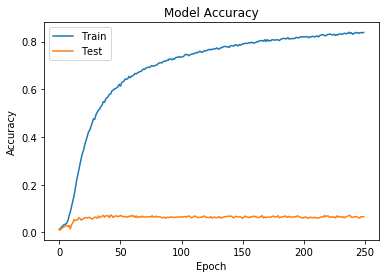

In [31]:
import matplotlib.pyplot as plt
plt.plot(cnn1.history['acc'])
plt.plot(cnn1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

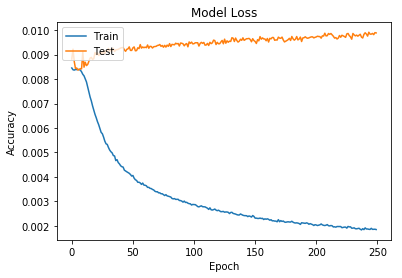

In [32]:
import matplotlib.pyplot as plt
plt.plot(cnn1.history['loss'])
plt.plot(cnn1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()